# **The Hepatocellular Carcinoma Dataset**

O dataset HCC foi obtido do Centro Hospitalar e Universitário de Coimbra (CHUC) e contém dados reais de pacientes diagnosticados com HCC.

In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


Carregar o *dataset* :

In [2]:
df = pd.read_csv("hcc_dataset.csv")

In [3]:
df.columns #mostra todas as colunas de df

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

Legenda das colunas:

*   Gender - género do paciente
*   Symptoms - se o paciente apresenta sintomas de HCC ou não
*   Alcohol - se o paciente tem hábito de beber álcool ou não
*   HBsAg - resultado do teste de antigénio de superfície da hepatite B
*   HBeAg - resultado do teste do antigénio da hepatite B
*   HBcAb - resultado do teste de anticorpos principais da hepatite B
*   HCVAb - resultado do teste sorológico do vírus da hepatite C
*   Cirrhosis - se o paciente tem cirrose ou não
*   Endemic - se o paciente visitou países endémicos
*   Smoking - se o paciente é fumador ou não
*   Diabetes - se o paciente tem diabetes ou não
*   Obesity - se o paciente tem obesidade ou não
*   Hemochro - se o paciente tem hemocromatose ou não
*   AHT - hipertensão arterial
*   CRI - se o paciente tem insuficiência renal crónica ou não
*   HIV - se o paciente tem HIV ou não
*   NASH - se o paciente tem esteatohepatite não alcoólica (EHNA) ou não
*   Varices - se o paciente tem varizes esofágicas ou não
*   Spleno - se o paciente tem esplenomegalia ou não
*   PHT - se o paciente tem hipertensão portal (HP) ou não
*   PVT - se o paciente tem trombose da veia porta (TVP) ou não
*   Metastasis - se o paciente tem metástese ou não
*   Hallmark - se foi encontrada uma marca radiológica de HCC
*   Age - idade do paciente
*   Grams_day - gramas de álcool consumidas pelo paciente por dia
*   Packs_year - número de maços de tabaco fumados pelo paciente por ano
*   PS - status de desempenho, capacidade de realizar certas atividades da vida diária
*   Encephalopathy - grau de encefalopatia hepática
*   Ascites - presença de ascite (líquido) no abdómen
*   INR - Razão normalizada internacional (INR) do tempo de protrombina do paciente
*   AFP - nível de alfafetoproteína no sangue
*   Hemoglobin - nível de hemoglobina no sangue
*   MCV - volume corpuscular médio (VCM) dos glóbulos vermelhos
*   Leucocytes - número de leucócitos no sangue
*   Platelets - número de plaquetas no sangue
*   Albumin - nível de albumina no sangue
*   Total_bil - nível de bilirrubina total no sangue
*   ALT - nível de alanina aminotransferase no sangue
*   AST - nível de aspartate transaminase no sangue
*   GGT - nível de gama glutamil transferase no sangue
*   ALP - nível de fosfatase alcalina no sangue
*   TP - nível de proteínas totais no sangue
*   Creatinine - nível de creatinina sérica no sangue
*   Nodules - número de nódulos
*   Major_dim - dimensão principal do nódulo
*   Dir_bill - nível de bilirrubina direta (substância na bile) no sangue
*   Iron - nível de ferro no sangue
*   Sat - saturação de oxigénio
*   Ferritin - nível de ferritina no sangue
*   Class - se o paciente sobrevive ou não














In [4]:
#mostrar todo o dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives
5,Male,No,Yes,No,?,No,No,Yes,No,?,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,75,?,?,Restricted,NaN,Mild,1.58,110,13.4,91.5,5.4,85,3.4,3.5,91,122,242,396,5.6,0.9,1,10,1.4,53,22,111,Dies
6,Male,No,No,No,?,Yes,Yes,Yes,No,No,Yes,No,?,No,No,No,No,No,No,No,No,No,Yes,49,0,0,Active,NaN,NaN,1.4,138.9,10.4,102,3.2,42000,2.35,2.72,119,183,143,211,7.3,0.8,5,2.6,2.19,171,126,1452,Dies
7,Male,Yes,Yes,No,?,No,No,Yes,No,Yes,Yes,?,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,61,?,20,Selfcare,NaN,NaN,1.46,9860,10.8,92,3,58,3.1,3.2,79,108,184,300,7.1,0.52,2,9,1.3,42,25,706,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,?,Yes,Yes,No,No,Yes,50,100,32,Restricted,NaN,Mild,3.14,8.8,11.9,107.5,4.9,70,1.9,3.3,26,59,115,63,6.1,0.59,1,6.4,1.2,85,73,982,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,43,100,0,Active,NaN,NaN,1.12,1.8,11.8,87.8,5100,193000,4.2,0.5,71,45,256,303,7.1,0.59,1,9.3,0.7,?,?,?,Lives


## Variáveis:

In [5]:
colunas_quantitativas = []
colunas_qualitativas = []
colunas_totais = []

for coluna in df.columns[:-1]: # iterar sobre todas as colunas do dataset, exceto a última -> "Class"
    colunas_totais.append(coluna)
    if any(pd.to_numeric(df[coluna], errors='coerce').notnull()): # verifica se a coluna contém pelo menos um valor numérico
        #converte os valores da coluna para valores numéricos (não numéricos passam a NaN)
        #se houver pelo menos um valor númerico a coluna passa a quantitativa
        colunas_quantitativas.append(coluna)
    else:
        #se não houver valores numéricos, a coluna é considerada qualitativa
        colunas_qualitativas.append(coluna)
print("Colunas Quantitativas ({}):".format(len(colunas_quantitativas)))
print(colunas_quantitativas)
print("\nColunas Qualitativas ({}):".format(len(colunas_qualitativas)))
print(colunas_qualitativas)
print("\nColunas Totais ({}):".format(len(colunas_totais)))
print(colunas_totais)

Colunas Quantitativas (23):
['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

Colunas Qualitativas (26):
['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'Encephalopathy', 'Ascites']

Colunas Totais (49):
['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Crea

Há 49 variáveis representadas nas colunas:
Sendo 23 quantitativas: 'Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin'.

E 26 qualitativas: 'Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'PS', 'Encephalopathy', 'Ascites'.







## Verificação da existência de anomalias

No entanto, as colunas não estão completas, visto que há vários espaços vazios e pontos de interrogação.

In [6]:
espaços_vazios=0
espaços_vazios_por_coluna = df.isnull().sum() # calcula o número de valores nulos em cada coluna
espaços_vazios = espaços_vazios_por_coluna.sum() # soma o número total de valores nulos em todas as colunas
print("Número de valores nulos em cada coluna:")
print(espaços_vazios_por_coluna)
print("\nTotal de valores nulos em todas as colunas:", espaços_vazios)

Número de valores nulos em cada coluna:
Gender              0
Symptoms            0
Alcohol             0
HBsAg               0
HBeAg               0
HBcAb               0
HCVAb               0
Cirrhosis           0
Endemic             0
Smoking             0
Diabetes            0
Obesity             0
Hemochro            0
AHT                 0
CRI                 0
HIV                 0
NASH                0
Varices             0
Spleno              0
PHT                 0
PVT                 0
Metastasis          0
Hallmark            0
Age                 0
Grams_day           0
Packs_year          0
PS                  0
Encephalopathy    142
Ascites           109
INR                 0
AFP                 0
Hemoglobin          0
MCV                 0
Leucocytes          0
Platelets           0
 Albumin            0
Total_Bil           0
ALT                 0
AST                 0
GGT                 0
ALP                 0
TP                  0
Creatinine          0
Nodules       

Através desta função, conseguimos perceber que há um total de 251 valores nulos (espaços vazios) nas colunas.


Vamos agora verificar os "?"

In [7]:
interrogações=0
interrogaçõesporcoluna = (df == '?').sum() #calcula o número de '?' em cada coluna
interrogações = interrogaçõesporcoluna.sum() #soma o número total de '?' em todas as colunas
print("Número de '?' em cada coluna:")
print(interrogaçõesporcoluna)
print("Número total de '?':")
print(interrogações)

Número de '?' em cada coluna:
Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron

Através desta função, conseguimos perceber que há um total de 826 pontos de interrogação nas colunas.


In [8]:
print(df[["Encephalopathy", "Ascites"]].head(20))

   Encephalopathy          Ascites
0             NaN              NaN
1             NaN              NaN
2             NaN             Mild
3             NaN              NaN
4             NaN              NaN
5             NaN             Mild
6             NaN              NaN
7             NaN              NaN
8             NaN             Mild
9             NaN              NaN
10            NaN             Mild
11            NaN              NaN
12            NaN              NaN
13            NaN              NaN
14     Grade I/II             Mild
15            NaN             Mild
16     Grade I/II              NaN
17            NaN              NaN
18            NaN              NaN
19            NaN  Moderate/Severe


Agora queremos colocar os NaN como "Nothing", já que estes apenas mostram que a pessoa não tem determinada característica qualitativa.

In [9]:
for col in df.columns: 
    df[col].fillna("Nothing", inplace=True) #troca os NaN por Nothing no própio dataset
print(df[["Encephalopathy", "Ascites"]].head(20))

   Encephalopathy          Ascites
0         Nothing          Nothing
1         Nothing          Nothing
2         Nothing             Mild
3         Nothing          Nothing
4         Nothing          Nothing
5         Nothing             Mild
6         Nothing          Nothing
7         Nothing          Nothing
8         Nothing             Mild
9         Nothing          Nothing
10        Nothing             Mild
11        Nothing          Nothing
12        Nothing          Nothing
13        Nothing          Nothing
14     Grade I/II             Mild
15        Nothing             Mild
16     Grade I/II          Nothing
17        Nothing          Nothing
18        Nothing          Nothing
19        Nothing  Moderate/Severe


/tmp/ipykernel_10037/215906163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Nothing", inplace=True) #troca os NaN por Nothing no própio dataset


Agora temos de trocar os "?" por "NaN" -  convenção padrão para representar valores ausentes em pandas.


In [10]:
for col in df.columns:
    df.loc[df[col]=="?",col] = float("NaN")

Verificação:

In [11]:
interrogações_final=0
interrogações_final_porcoluna = (df == '?').sum()
interrogações_final = interrogações_final_porcoluna.sum()
print("Número de '?' em cada coluna:")
print(interrogações_final_porcoluna)
print("Número total de '?':")
print(interrogações_final)

Número de '?' em cada coluna:
Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin  

Como foi agora verificado, conseguimos trocar os  "?" por NaN (Not a Number) de forma correta.


Outra possível anomalia está relacionada com a não uniformidade das palavras nas Variáveis Quantitativas.   

In [12]:
for variavel in colunas_qualitativas:
    print(df[variavel].value_counts()) #número de ocorrências de cada valor único em cada coluna qualitativa
    print(' ')

Gender
Male      133
Female     32
Name: count, dtype: int64
 
Symptoms
Yes    94
No     53
Name: count, dtype: int64
 
Alcohol
Yes    122
No      43
Name: count, dtype: int64
 
HBsAg
No     132
Yes     16
Name: count, dtype: int64
 
HBeAg
No     125
Yes      1
Name: count, dtype: int64
 
HBcAb
No     103
Yes     38
Name: count, dtype: int64
 
HCVAb
No     122
Yes     34
Name: count, dtype: int64
 
Cirrhosis
Yes    149
No      16
Name: count, dtype: int64
 
Endemic
No     116
Yes     10
Name: count, dtype: int64
 
Smoking
Yes    63
No     61
Name: count, dtype: int64
 
Diabetes
No     106
Yes     56
Name: count, dtype: int64
 
Obesity
No     135
Yes     20
Name: count, dtype: int64
 
Hemochro
No     135
Yes      7
Name: count, dtype: int64
 
AHT
No     103
Yes     59
Name: count, dtype: int64
 
CRI
No     143
Yes     20
Name: count, dtype: int64
 
HIV
No     148
Yes      3
Name: count, dtype: int64
 
NASH
No     135
Yes      8
Name: count, dtype: int64
 
Varices
Yes    69
No     44
Nam

Conseguimos então concluir que não existe nenhuma anomalia deste tipo.

Uma vez que ter valores negativos neste tipo de variáveis é uma anomalia, vamos agora verificar se existe algum.



In [13]:
numeros_negativos = 0
for col in colunas_quantitativas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  #converte a coluna para valores numéricos
    numeros_negativos += (df[col] < 0).sum()  #soma o número de valores negativos na coluna
print(numeros_negativos)

0


Assim, é possível concluir que não há valores negativos.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

In [15]:
df.dtypes

Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Varices            object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age               float64
Grams_day         float64
Packs_year        float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
 Albumin          float64
Total_Bil         float64
ALT               float64
AST         

Como algumas das variáveis quantitativas eram do tipo *object*, colocamo-las em *float*.

In [16]:
for col in colunas_quantitativas:
    df[col]= df[col].astype(float)

In [17]:
df.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


## Gráficos

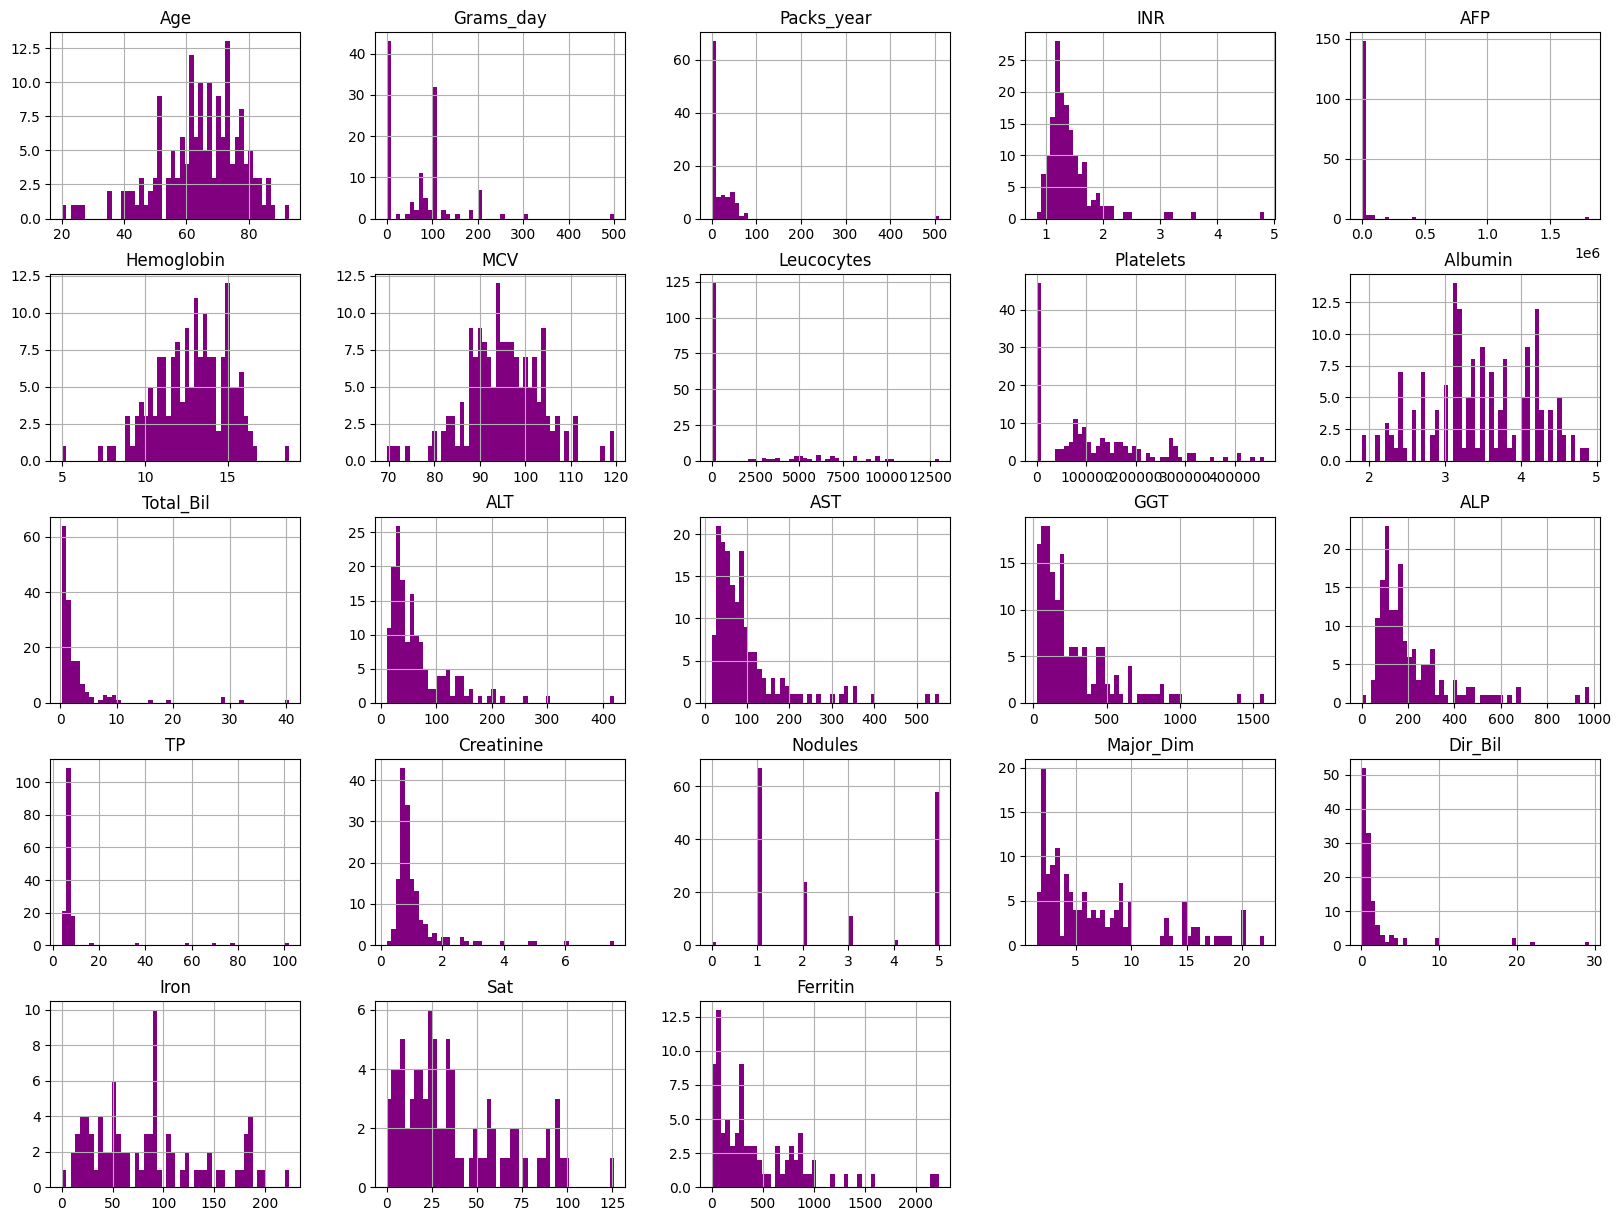

In [18]:
df.hist(bins=50, figsize=(20,15), color = 'purple') #gráfico com 50 barras, 20 comprimento, 15 altura
plt.show()

O eixo dos yy representa a frequência das variáveis quantitativas apresentadas em xx. Assim, compreendemos alguns valores normais e os valores de maior frequência destas variáveis.

Por exemplo, a maioria dos pacientes tem níveis de hemoglobina dentro da faixa normal (12,5 a 15 g/dL).

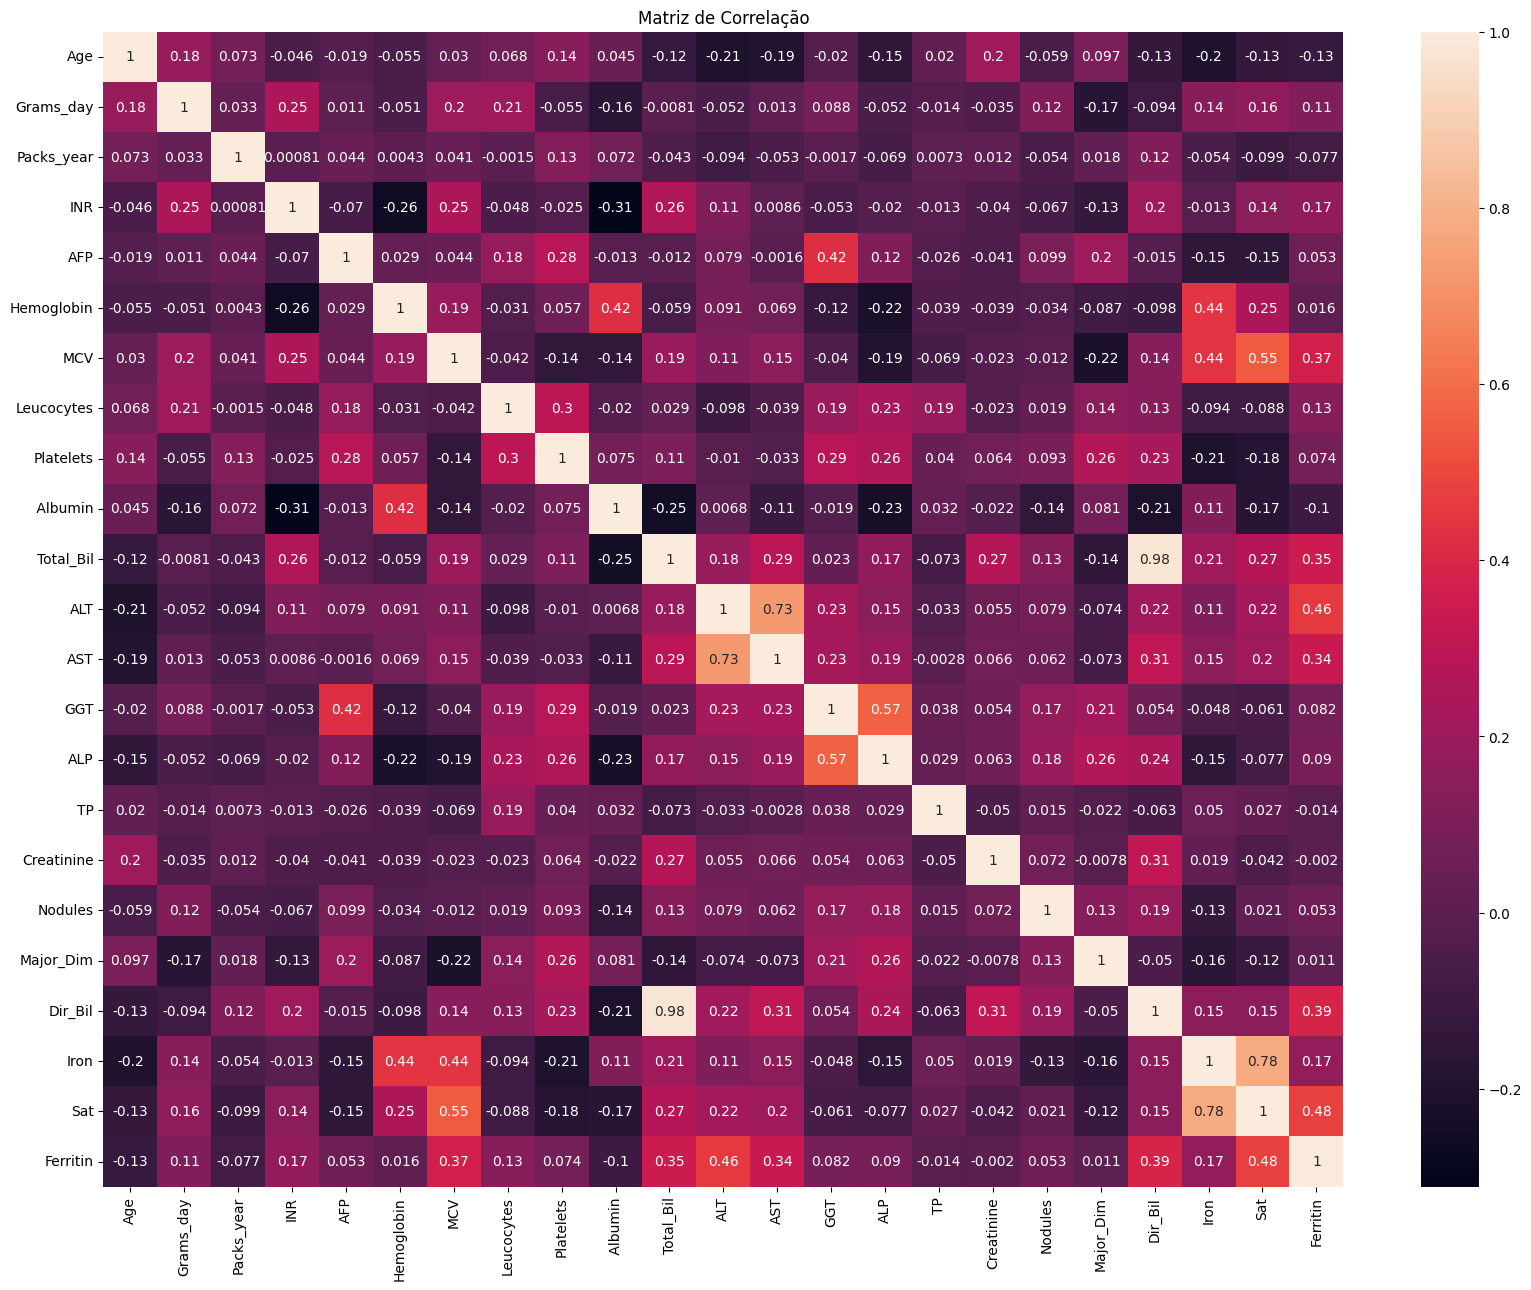

In [19]:
correlacao = df[colunas_quantitativas]
matriz_correlacao = correlacao.corr()

plt.figure(figsize=(20,15))
sns.heatmap(matriz_correlacao, annot=True) #Adiciona os valores dos coeficientes de correlação diretamente às células do mapa
plt.title('Matriz de Correlação')
plt.show()


Na Matriz de Correlação, quanto maior o valor, mais interligadas estão as variáveis. Neste caso, quanto mais clara estiver a correlação, maior a proximidade entre as variáveis.

Assim, Dir_Bil e Total_Bil com 0.98,  Iron e Sata com 0.78 e ALT e AST com 0.73 são as variáveis quantitativas mais relacionadas. No entanto, apenas iremos eliminar Dir_Bil por ser a correlação com o valor mais significativo.

In [20]:
#Apagar Dir_Bil
df= df.drop(columns=['Dir_Bil'])
colunas_quantitativas.remove('Dir_Bil')

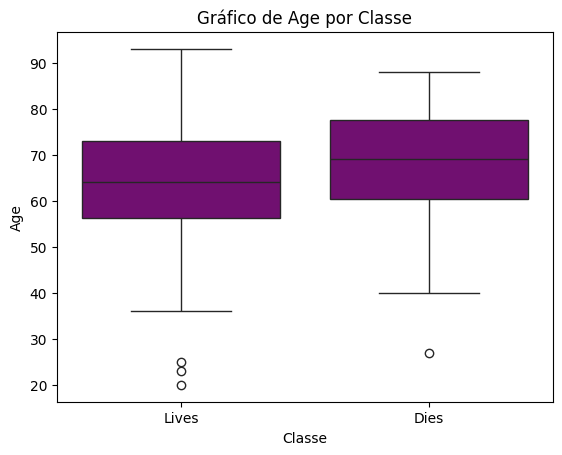

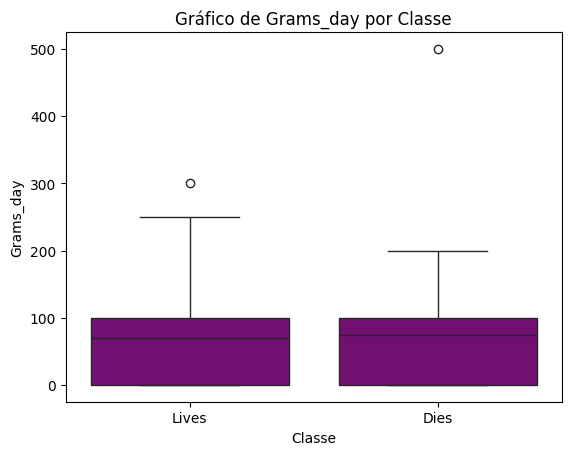

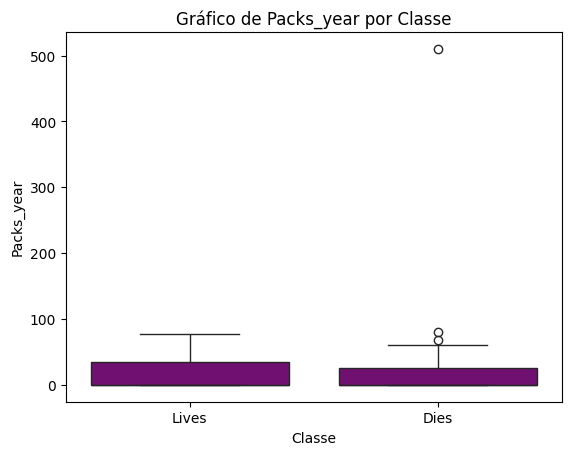

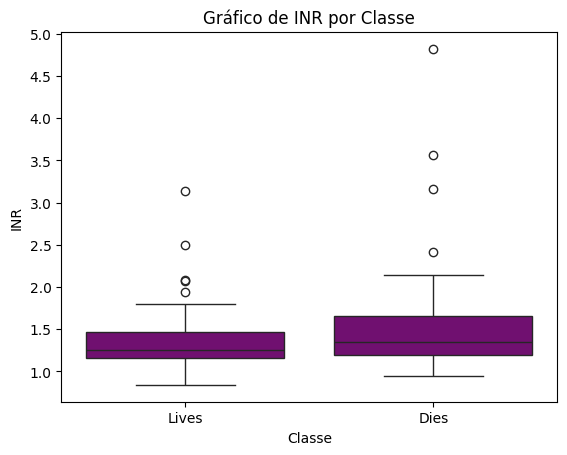

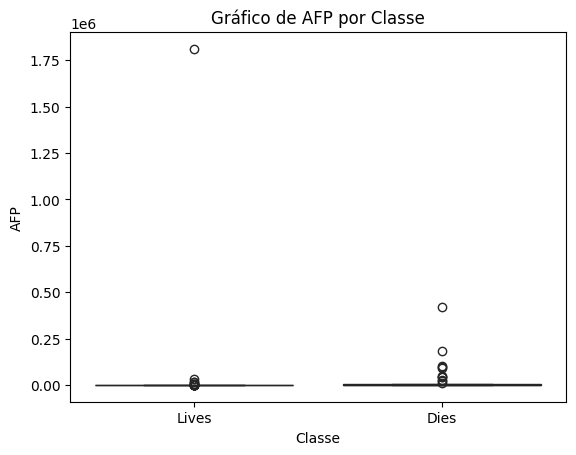

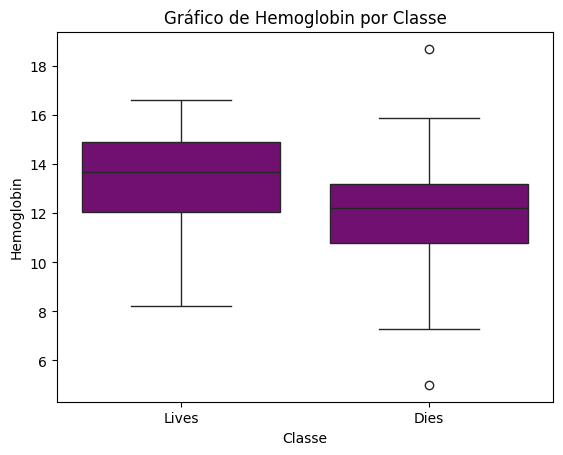

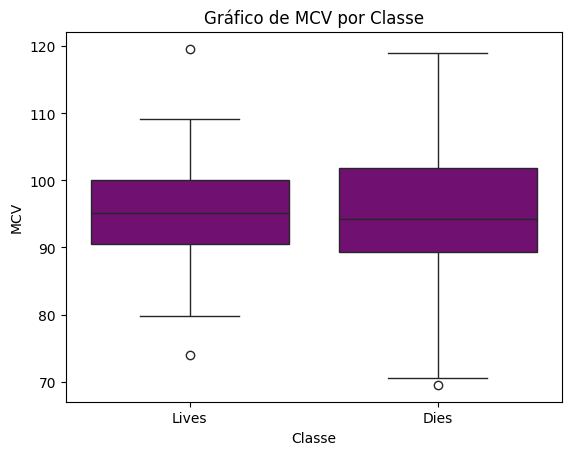

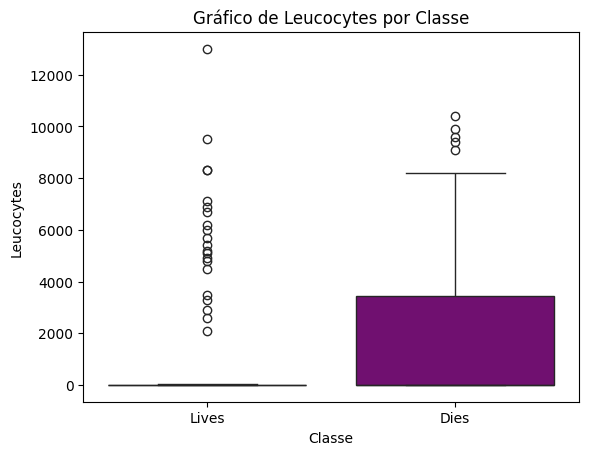

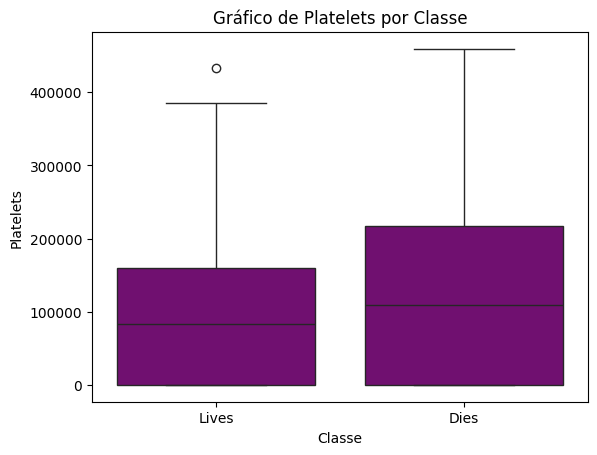

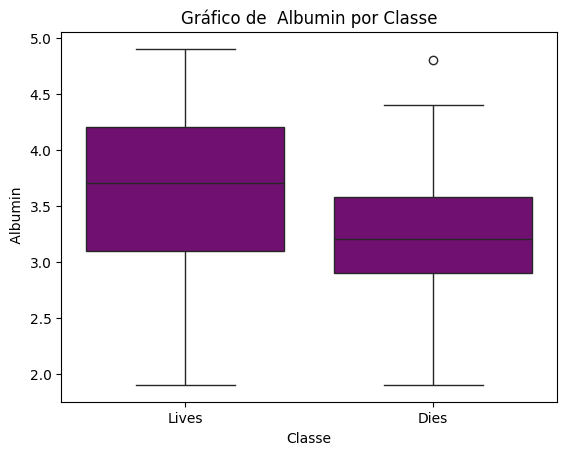

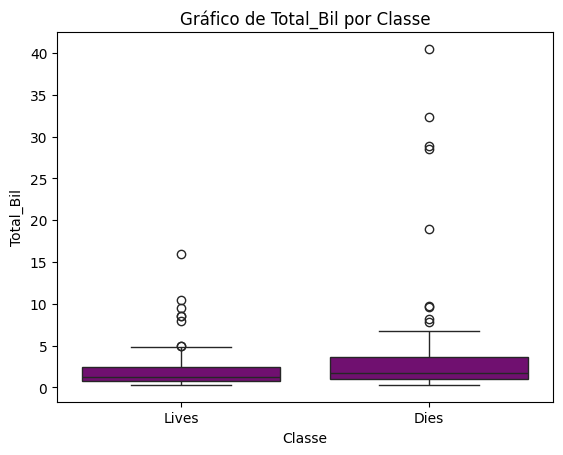

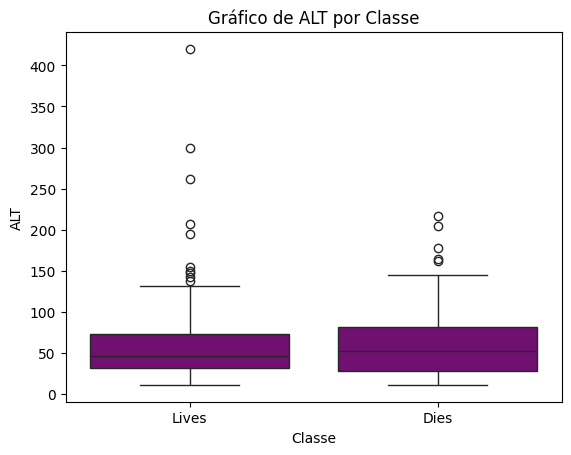

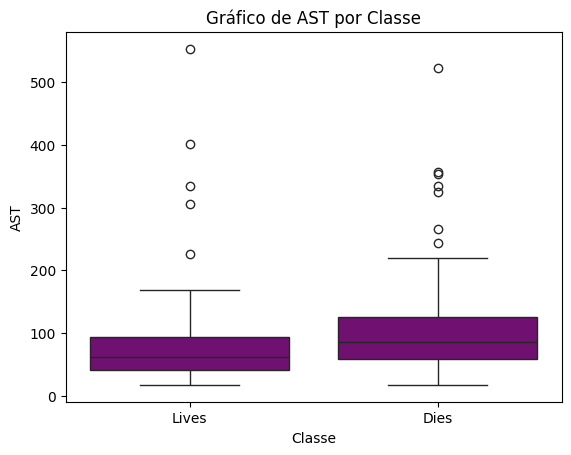

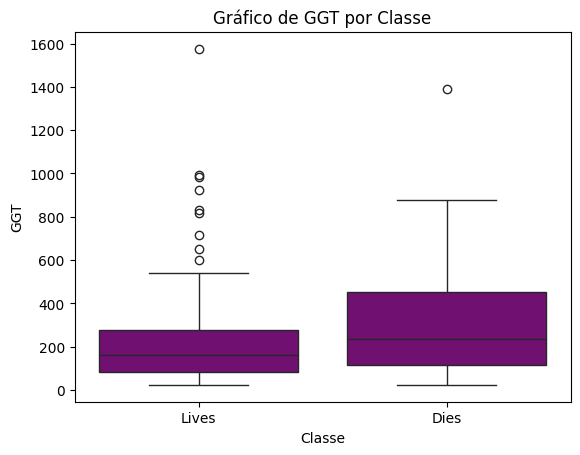

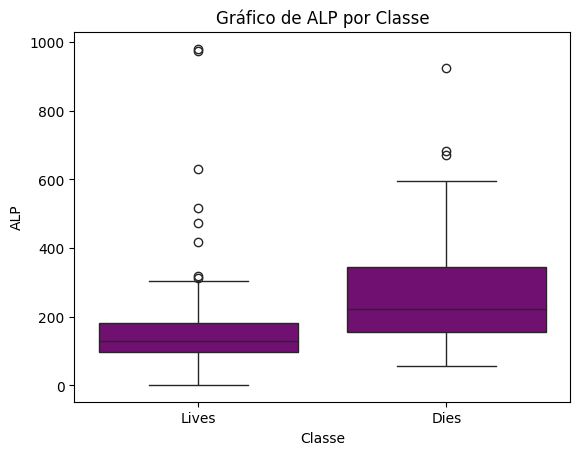

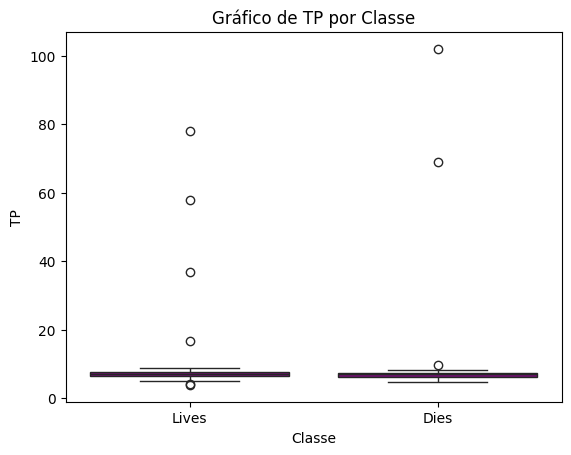

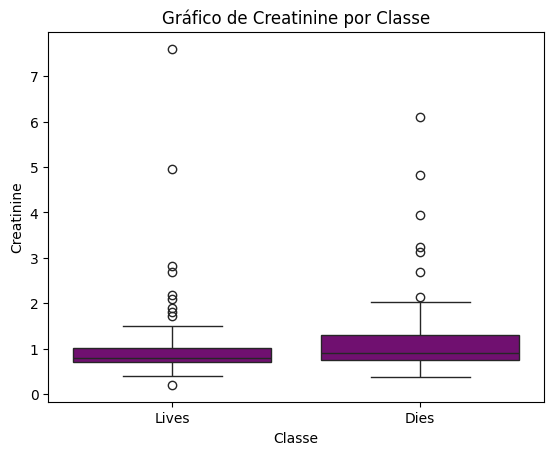

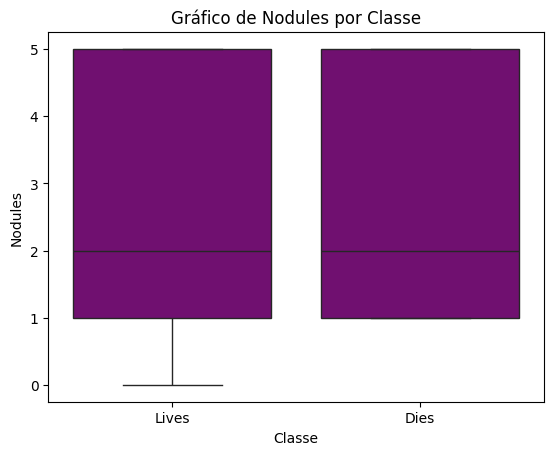

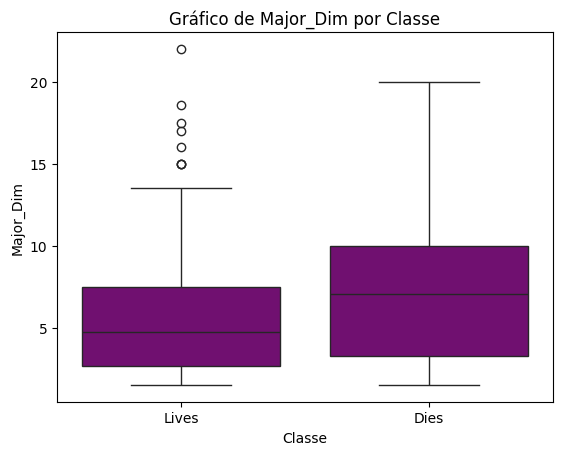

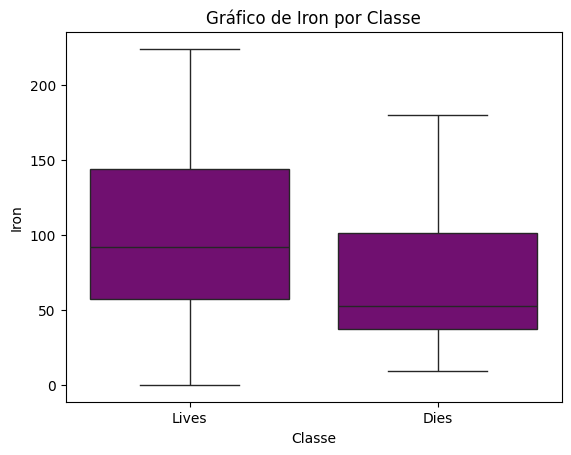

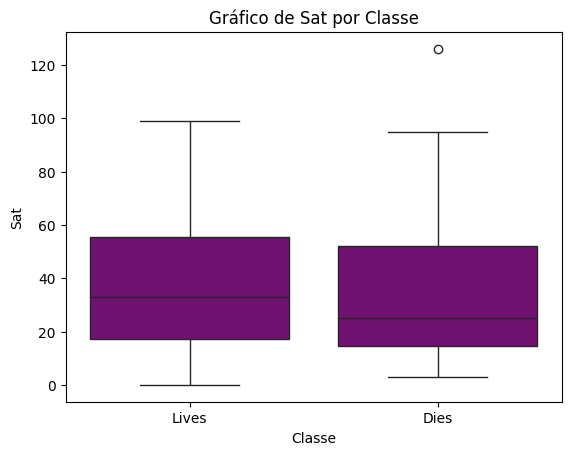

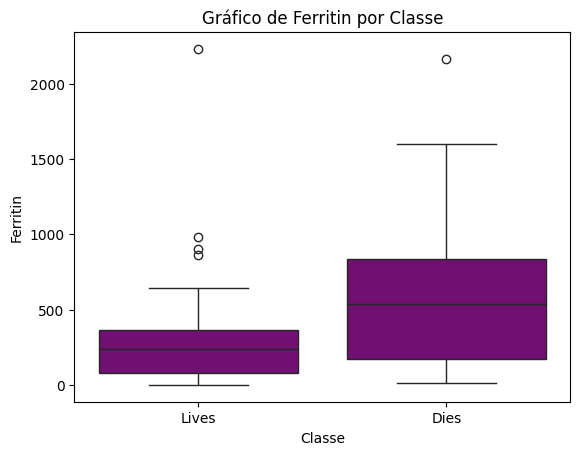

In [21]:
for var in colunas_quantitativas:
    sns.boxplot(x="Class",y=var,data = df, color='purple')
    plt.xlabel("Classe")
    plt.ylabel(var)
    plt.title(f"Gráfico de {var} por Classe")
    plt.show()

In [22]:
print(df[["AFP", "Class"]].head(60))

         AFP  Class
0       95.0  Lives
1        NaN  Lives
2        5.8  Lives
3     2440.0   Dies
4       49.0  Lives
5      110.0   Dies
6      138.9   Dies
7     9860.0   Dies
8        8.8  Lives
9        1.8  Lives
10  100809.0   Dies
11      86.0  Lives
12      60.0  Lives
13       6.6  Lives
14      29.0  Lives
15       4.6  Lives
16      60.0   Dies
17       9.2  Lives
18       8.8  Lives
19      34.0   Dies
20      19.6  Lives
21       3.9  Lives
22    1975.0   Dies
23     185.0   Dies
24    5532.0   Dies
25   13327.0  Lives
26       NaN   Dies
27       5.9  Lives
28    3255.0   Dies
29       1.9  Lives
30      11.0  Lives
31    1237.0  Lives
32       7.7  Lives
33     266.0  Lives
34    5689.0  Lives
35      14.2  Lives
36       3.1   Dies
37     633.0   Dies
38       5.4  Lives
39     479.0  Lives
40      19.0  Lives
41       2.8  Lives
42  185203.0   Dies
43       5.0  Lives
44     237.0  Lives
45       2.8  Lives
46       NaN  Lives
47      16.0   Dies
48     163.0   Dies


Após visualizar os conjuntos de gráficos já representados, conseguimos detetar divergências em algumas variáveis, logo não é possível visualizar de forma ideal a distribuição dos valores por essas mesmas variáveis. Deste modo, iremos remover temporariamente esses valores (outliers) com o intuíto de verificarmos, de forma mais simples, os gráficos. Assim, os gráficos que iremos atualizar são: Grams_day, Packs_year, INR, AFP,Total_bil, ALT, AST, GGT, TP, Creatine.

As atualizações que iremos realizar serão:

* Grams_day: novo valor máximo = 400
* Packs_year: novo valor máximo = 200
* INR: novo valor máximo = 3.5
* AFP: novo valor máximo = 0.5 * 10^6
* Total_Bil: novo valor máximo = 25
* ALT: novo valor máximo = 250
* AST: novo valor máximo = 350
* GGT: novo valor máximo = 1100
* TP: novo valor máximo = 20
* Creatinine: novo valor máximo = 4.5

In [23]:
dataset_sem_outliers = deepcopy(df) #cria um novo dataset, sem afetar o dataset original
dataset_sem_outliers.loc[dataset_sem_outliers["Grams_day"] >= 400,"Grams_day"] = float("NaN") #se os valores forem maiores que 400, serão substituidos por NaN.
dataset_sem_outliers.loc[dataset_sem_outliers["Packs_year"] >= 200,"Packs_year"]= float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["INR"] >= 3.5,"INR"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["AFP"] >= 20000,"AFP"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["Total_Bil"] >= 25,"Total_Bil"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["ALT"] >= 250,"ALT"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["AST"] >= 350,"AST"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["GGT"] >= 1100,"GGT"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["TP"] >= 20,"TP"] = float("NaN")
dataset_sem_outliers.loc[dataset_sem_outliers["Creatinine"] >= 4.5,"Creatinine"] = float("NaN")

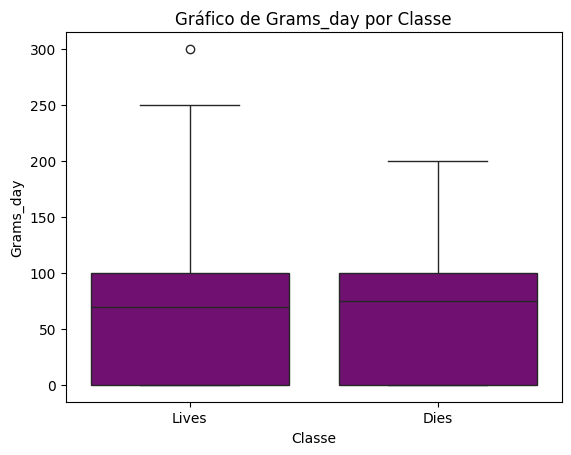

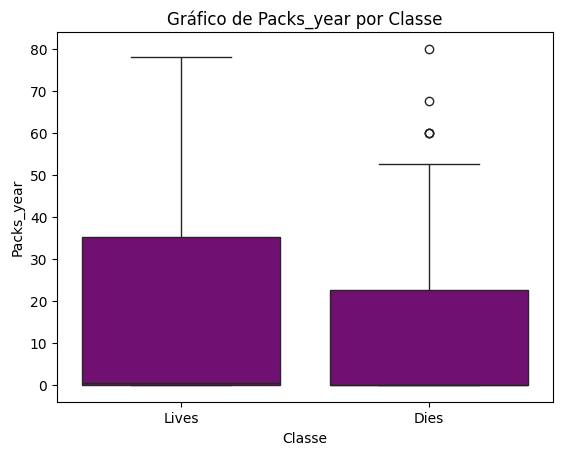

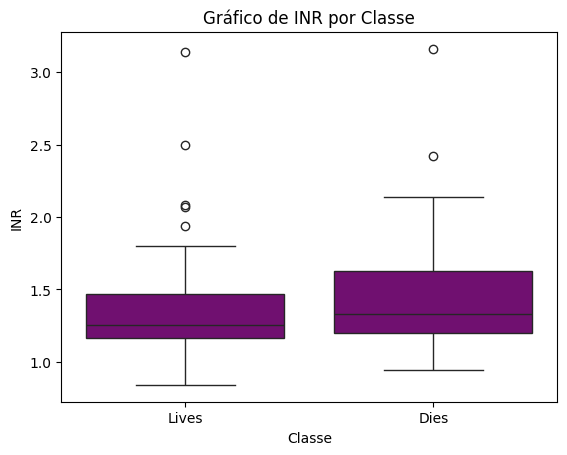

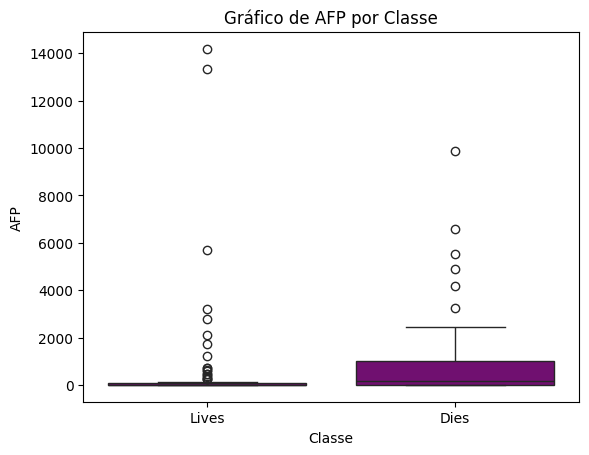

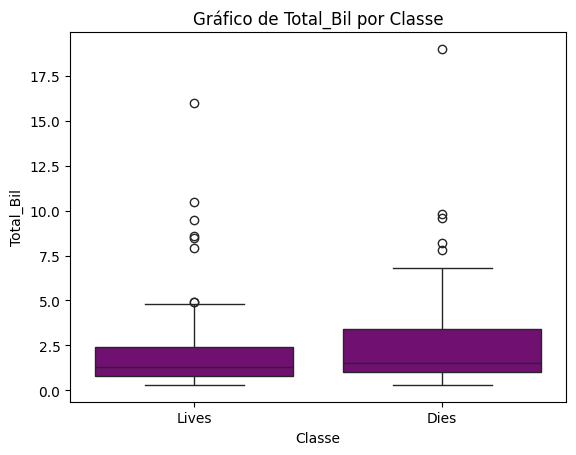

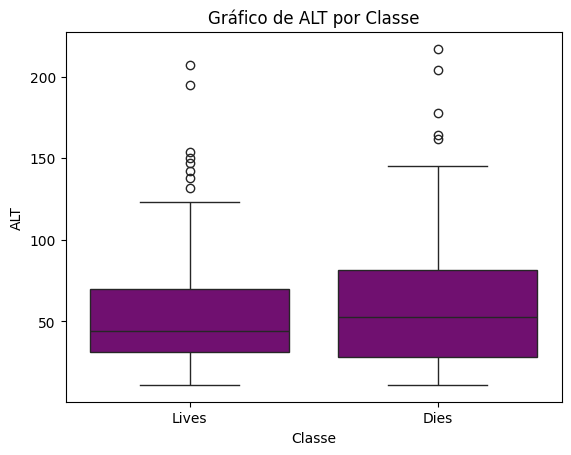

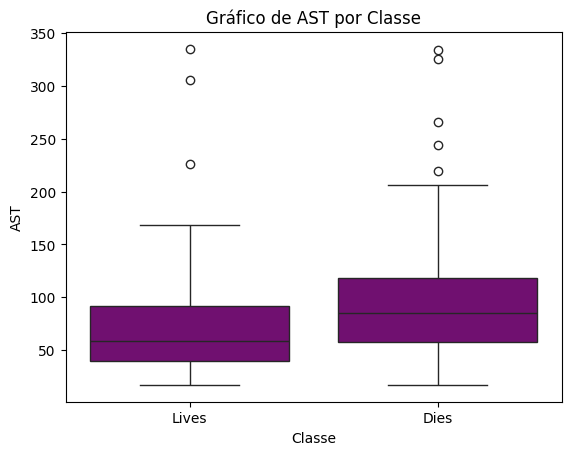

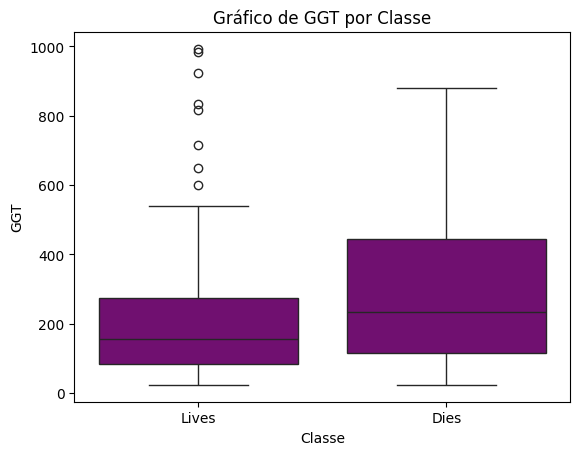

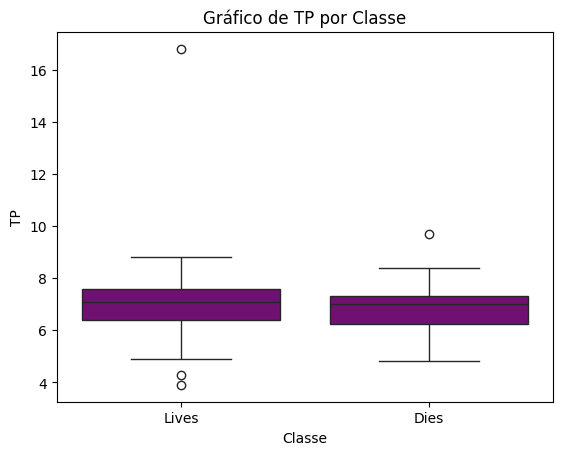

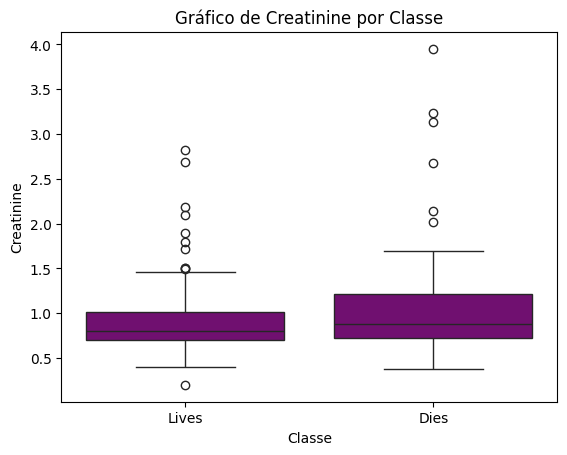

In [24]:
variaveis_sem_outliers= ["Grams_day", "Packs_year", "INR", "AFP","Total_Bil", "ALT", "AST", "GGT", "TP", "Creatinine"]
for var in variaveis_sem_outliers:
    sns.boxplot(x="Class",y=var,data = dataset_sem_outliers, color='purple')
    plt.xlabel("Classe")
    plt.ylabel(var)
    plt.title(f"Gráfico de {var} por Classe")
    plt.show()

Através das boxplots, conseguimos averiguar que existe uma grande chance de as variáveis que têm uma maior diferença entre os gráficos "Lives" e "Dies" serem também as que irão influenciar mais na probabilidade de sobrevivência do paciente.

Deste modo, concluimos que são mais relevantes: "Packs_Year", "INR", "AFP", "Hemogloblin", "Leucocytes", "Plateletes", "Albumin", "Total_Bil", "ALT", "AST", "GGT", "ALP", "Creatinine", "Major_Dim", "Iron" e "Ferritin".

## Remoção de valores potencialmente erráticos

In [25]:
df.loc[df["AFP"] >= 20000,"AFP"] = float("NaN")  #Remover o valor

Gráfico sem o valor:

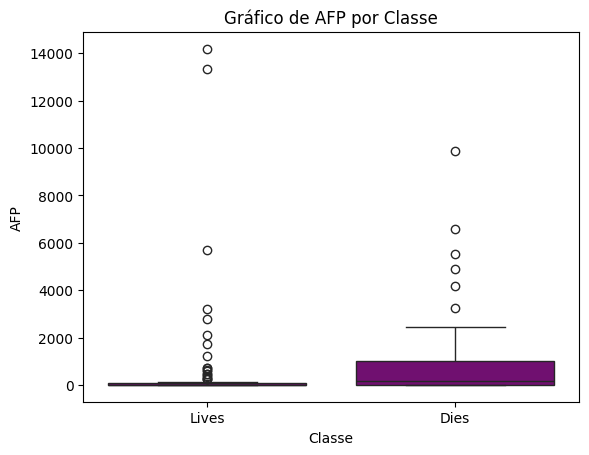

In [26]:
sns.boxplot(x="Class",y="AFP",data = df, color='purple')
plt.xlabel("Classe")
plt.ylabel("AFP")
plt.title(f"Gráfico de AFP por Classe")
plt.show()

## Variáveis Qualitativas

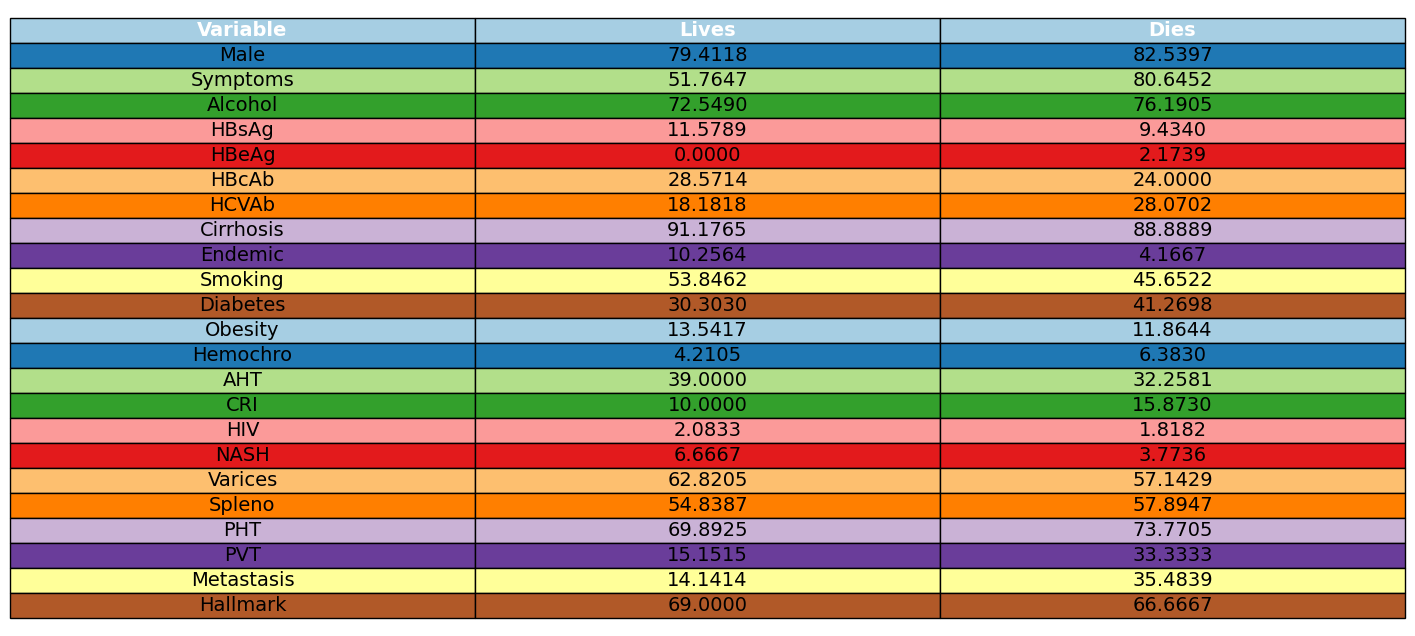

In [27]:
# Lista de características (exceto o Género)
caracteristicas = ['Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
                          'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity',
                          'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices',
                          'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark']

percentagens = []

# Número de homens e mulheres vivos e mortos
homens_vivos = df.loc[(df["Class"] == "Lives") & (df["Gender"] == "Male")].shape[0] #Contar o número de homens vivos no dataset
mulheres_vivas = df.loc[(df["Class"] == "Lives") & (df["Gender"] == "Female")].shape[0]  #Contar o número de mulheres vivas no dataset
homens_mortos = df.loc[(df["Class"] == "Dies") & (df["Gender"] == "Male")].shape[0]  #Contar o número de homens mortos no dataset
mulheres_mortas = df.loc[(df["Class"] == "Dies") & (df["Gender"] == "Female")].shape[0]  #Contar o número de mulheres mortas no dataset

# Percentagens relativas aos homens (não iremos fazer para as mulheres, uma vez que corresponde ao complementar dos homens)
percentagem_homens_vivos = homens_vivos / (mulheres_vivas + homens_vivos) * 100
percentagem_homens_mortos = homens_mortos / (mulheres_mortas + homens_mortos) * 100
percentagens.append({"Variable": "Male", "Lives": ("%0.4f" %percentagem_homens_vivos), "Dies": ("%0.4f" %percentagem_homens_mortos)})

# Adiciona os dados a cada variável
for coluna in caracteristicas:
    #Contagem de vivos com e sem a característica
    vivo_caracteristica = df.loc[(df["Class"] == "Lives") & (df[coluna] == "Yes")].shape[0]
    vivo_nao_caracteristica =  df.loc[(df["Class"] == "Lives") & (df[coluna] == "No")].shape[0]
    #Contagem de mortos com e sem a característica
    morto_caracteristica = df.loc[(df["Class"] == "Dies") & (df[coluna] == "Yes")].shape[0]
    morto_nao_caracteristica = df.loc[(df["Class"] == "Dies") & (df[coluna] == "No")].shape[0]

    # Percentagens tendo em conta se o paciente apresentava alguma carcterística ou não
    percentagem_vivos_sim = vivo_caracteristica / (vivo_nao_caracteristica + vivo_caracteristica) * 100
    percentagem_mortos_sim = morto_caracteristica / (morto_nao_caracteristica + morto_caracteristica) * 100

    percentagens.append({'Variable': coluna, 'Lives': ("%0.4f" %percentagem_vivos_sim), 'Dies': ("%0.4f" %percentagem_mortos_sim)})

# Criar DataFrame com os resultados
percentagens_df = pd.DataFrame(percentagens)

# Criar a tabela
paleta = sns.color_palette("Paired")

# Criar a tabela com o matplotlib
fig, ax = plt.subplots(figsize = (12, 8))
table = ax.table(cellText = percentagens_df.values,
          colLabels = percentagens_df.columns,
          cellLoc = 'center',
          loc ='center')

# Estilo das células
table.set_fontsize(14)
table.scale(1.5, 1.5)  
for i in range(len(percentagens_df.columns)):
    table[(0,i)].set_facecolor(paleta[0]) 
    table[(0,i)].get_text().set_color('white')  
    table[(0,i)].get_text().set_weight('bold')  
    for j in range(1, len(percentagens_df) + 1):
        table[(j,i)].set_facecolor(paleta[j % len(paleta)])  # Alternar cores de fundo das células


# Remover eixos
ax.axis('off')

plt.show()

Com base nesta tabela, é possível concluir que as variáveis qualitativas que aparentam ter mais impacto na classificação final são as que os valores entre "*Lives*" e "*Dies*" mais diferem entre si, ou seja, "Symptoms", "HCVAb", "Endemic", "Smoking", "Diabetes, "AHT", "CRI", "PVT" e "Metasis".

## Preenchimento de dados em falta ##

Para preenchermos os dados em falta das variáveis qualitativas e quantitativas, iremos utilizar a moda e a mediana, respetivamente.

Primeiramente, necessitamos de criar um novo *Dataset*:

In [28]:
moda_mediana = deepcopy(df)

Preencher os espaços vazios das variáveis qualitativas utilizando a moda:

In [29]:
for col in colunas_qualitativas:
  moda = moda_mediana[col].mode().iloc[0] #Seleciona a coluna e faz a sua moda. Caso haja mais que um resultado, irá escolher o primeiro.
  moda_mediana[col].fillna(moda, inplace=True) #Substitui todos os NaN pela moda no próprio DataFrame (não cria uma cópia)

/tmp/ipykernel_10037/3265997144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  moda_mediana[col].fillna(moda, inplace=True) #Substitui todos os NaN pela moda no próprio DataFrame (não cria uma cópia)


Preencher os espaços vazios das variáveis quantitativas utilizando a mediana:

In [30]:
for col in colunas_quantitativas:
  mediana = moda_mediana[col].median() #Seleciona a coluna e faz a sua mediana
  moda_mediana[col].fillna(mediana, inplace=True) #Substitui todos os NaN pela moda no próprio DataFrame (não cria uma cópia)

/tmp/ipykernel_10037/2638699451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  moda_mediana[col].fillna(mediana, inplace=True) #Substitui todos os NaN pela moda no próprio DataFrame (não cria uma cópia)
/tmp/ipykernel_10037/2638699451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

Para verificar as alterações:

In [31]:
moda_mediana.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,64.690909,72.169697,13.890909,1.418897,633.535333,12.882121,95.116667,1447.293158,112839.052788,3.443879,3.036788,66.678788,95.921212,266.416970,211.298667,8.833636,1.115333,2.727273,6.626788,84.354545,32.166424,369.180606
std,13.319534,64.176930,43.491732,0.472327,1955.912216,2.125649,8.328639,2889.070403,106168.907631,0.672537,5.422670,56.894853,86.747108,256.647138,166.536394,11.338656,0.936911,1.788730,4.812579,40.120263,21.350400,335.015936
min,20.000000,0.000000,0.000000,0.840000,1.200000,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.180000,5.200000,11.500000,90.000000,5.100000,270.000000,3.100000,0.900000,31.000000,47.000000,92.000000,109.000000,6.400000,0.710000,1.000000,3.000000,78.000000,27.000000,283.000000
50%,66.000000,75.000000,0.000000,1.300000,20.000000,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,15.000000,1.530000,173.000000,14.600000,100.300000,15.400000,170000.000000,4.000000,2.800000,77.000000,108.000000,343.000000,260.000000,7.500000,1.100000,5.000000,8.500000,85.000000,29.500000,297.000000
max,93.000000,500.000000,510.000000,4.820000,14177.000000,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,224.000000,126.000000,2230.000000


In [32]:
moda_mediana.head(15)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67.0,137.0,15.0,Active,Nothing,Nothing,1.53,95.0,13.70,106.60,4.9,99.0,3.40,2.10,34.0,41.0,183.0,150.0,7.10,0.70,1.0,3.5,83.0,27.0,295.0,Lives
1,Female,Yes,No,No,No,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62.0,0.0,0.0,Active,Nothing,Nothing,1.30,20.0,13.05,94.95,7.2,93000.0,3.40,1.40,50.0,71.0,179.5,162.0,7.05,0.85,1.0,1.8,83.0,27.0,295.0,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78.0,50.0,50.0,Ambulatory,Nothing,Mild,0.96,5.8,8.90,79.80,8.4,472.0,3.30,0.40,58.0,68.0,202.0,109.0,7.00,2.10,5.0,13.0,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77.0,40.0,30.0,Active,Nothing,Nothing,0.95,2440.0,13.40,97.10,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.10,1.11,2.0,15.7,83.0,27.0,295.0,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76.0,100.0,30.0,Active,Nothing,Nothing,0.94,49.0,14.30,95.10,6.4,199.0,4.10,0.70,147.0,306.0,173.0,109.0,6.90,1.80,1.0,9.0,59.0,15.0,22.0,Lives
5,Male,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,75.0,75.0,0.0,Restricted,Nothing,Mild,1.58,110.0,13.40,91.50,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.60,0.90,1.0,10.0,53.0,22.0,111.0,Dies
6,Male,No,No,No,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,49.0,0.0,0.0,Active,Nothing,Nothing,1.40,138.9,10.40,102.00,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.30,0.80,5.0,2.6,171.0,126.0,1452.0,Dies
7,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,61.0,75.0,20.0,Selfcare,Nothing,Nothing,1.46,9860.0,10.80,92.00,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.10,0.52,2.0,9.0,42.0,25.0,706.0,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,Yes,50.0,100.0,32.0,Restricted,Nothing,Mild,3.14,8.8,11.90,107.50,4.9,70.0,1.90,3.30,26.0,59.0,115.0,63.0,6.10,0.59,1.0,6.4,85.0,73.0,982.0,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,43.0,100.0,0.0,Active,Nothing,Nothing,1.12,1.8,11.80,87.80,5100.0,193000.0,4.20,0.50,71.0,45.0,256.0,303.0,7.10,0.59,1.0,9.3,83.0,27.0,295.0,Lives


## Normalização dos valores

A normalização de amplitude, também conhecida como Min-Max Scaling, é uma técnica de pré-processamento de dados que transforma os valores das variáveis de modo que fiquem dentro de um intervalo específico, geralmente entre 0 e 1, utilizando o *Dataset* que foi preenchido utilizando a moda e mediana.
Esta técnica é útil para padronizar os dados, especialmente quando diferentes variáveis têm diferentes unidades de medida ou escalas, o que pode influenciar algoritmos de aprendizagem de máquina.

In [33]:
df_vazia = deepcopy(df)

In [34]:
# Normalização Min-Max
scaler = MinMaxScaler()
df_vazia[colunas_quantitativas] = scaler.fit_transform(df_vazia[colunas_quantitativas]) #Codificar os valores da coluna em números inteiros

# Exibir as primeiras linhas do DataFrame preenchido e normalizado
print(df_vazia.head(10))

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female      NaN      No    No    No    No   Yes       Yes     NaN     NaN   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   
5    Male       No     Yes    No   NaN    No    No       Yes      No     NaN   
6    Male       No      No    No   NaN   Yes   Yes       Yes      No      No   
7    Male      Yes     Yes    No   NaN    No    No       Yes      No     Yes   
8    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
9    Male      Yes     Yes    No    No    No    No       Yes      No      No   

  Diabetes Obesity Hemochro  AHT  CRI HIV NASH Varices Spleno  PHT  PVT  \
0      Yes     NaN      Yes   No   No  No   

Agora, para quantificar os resultados qualitativos:

In [35]:
# Selecionar apenas as colunas categóricas
df_categoricas = df_vazia.select_dtypes(include=['object'])

# Codificar as colunas categóricas
for col in df_categoricas.columns:
    df_vazia[col] = pd.factorize(df_vazia[col])[0]

# Exibir as primeiras linhas do DataFrame preenchido e normalizado
print(df_vazia.head(10))

   Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  Endemic  \
0       0         0        0      0      0      0      0          0        0   
1       1        -1        1      0      0      0      1          0       -1   
2       0         0        0      1      0      1      0          0        0   
3       0         1        0      0      0      0      0          0        0   
4       0         1        0      1      0      1      0          0        0   
5       0         0        0      0     -1      0      0          0        0   
6       0         0        1      0     -1      1      1          0        0   
7       0         1        0      0     -1      0      0          0        0   
8       0         1        0      0      0      0      0          0        0   
9       0         1        0      0      0      0      0          0        0   

   Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  \
0        0         0       -1         

Normalização de amplitude (*Min-Max Scaling*), utilizando o *Dataset* que foi preenchido utilizando a moda e mediana.

In [36]:
# Aplicar Min-Max Scaling nas colunas quantitativas
scaler = MinMaxScaler()
moda_mediana[colunas_quantitativas] = scaler.fit_transform(moda_mediana[colunas_quantitativas])

# Exibir as primeiras linhas do DataFrame preenchido e normalizado
print(moda_mediana.head(10))

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female      Yes      No    No    No    No   Yes       Yes      No     Yes   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   
5    Male       No     Yes    No    No    No    No       Yes      No     Yes   
6    Male       No      No    No    No   Yes   Yes       Yes      No      No   
7    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
8    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
9    Male      Yes     Yes    No    No    No    No       Yes      No      No   

  Diabetes Obesity Hemochro  AHT  CRI HIV NASH Varices Spleno  PHT  PVT  \
0      Yes      No      Yes   No   No  No   

Agora, para quantificar os resultados qualitativos:

In [37]:
# Selecionar apenas as colunas categóricas
df_categoricas = moda_mediana.select_dtypes(include=['object'])

# Codificar as colunas categóricas
for col in df_categoricas.columns:
    moda_mediana[col] = pd.factorize(moda_mediana[col])[0]

# Exibir as primeiras linhas do DataFrame preenchido e normalizado
print(moda_mediana.head(10))

   Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  Endemic  \
0       0         0        0      0      0      0      0          0        0   
1       1         1        1      0      0      0      1          0        0   
2       0         0        0      1      0      1      0          0        0   
3       0         1        0      0      0      0      0          0        0   
4       0         1        0      1      0      1      0          0        0   
5       0         0        0      0      0      0      0          0        0   
6       0         0        1      0      0      1      1          0        0   
7       0         1        0      0      0      0      0          0        0   
8       0         1        0      0      0      0      0          0        0   
9       0         1        0      0      0      0      0          0        0   

   Smoking  Diabetes  Obesity  Hemochro  AHT  CRI  HIV  NASH  Varices  Spleno  \
0        0         0        0         

Esta função atribui um valor numérico às variáveis qualitativas.


Para vizualizar as alterações realizadas:

In [38]:
moda_mediana.head(10)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.643836,0.274,0.029412,0,0,0,0.173367,0.006617,0.635036,0.740519,0.000208,0.000212,0.500000,0.044776,0.056235,0.044776,0.103093,0.151954,0.032620,0.067568,0.2,0.097561,0.370536,0.214286,0.132287,0
1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.575342,0.000,0.000000,0,0,0,0.115578,0.001326,0.587591,0.507984,0.000385,0.202611,0.500000,0.027363,0.095355,0.100746,0.100838,0.164214,0.032110,0.087838,0.2,0.014634,0.370536,0.214286,0.132287,0
2,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0.794521,0.100,0.098039,1,0,1,0.030151,0.000324,0.284672,0.205589,0.000477,0.001025,0.466667,0.002488,0.114914,0.095149,0.115335,0.110062,0.031600,0.256757,1.0,0.560976,0.125000,0.047619,0.007175,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0.780822,0.080,0.058824,0,0,0,0.027638,0.172040,0.613139,0.550898,0.000523,0.000604,0.600000,0.002488,0.012225,0.087687,0.045747,0.176475,0.042813,0.122973,0.4,0.692683,0.370536,0.214286,0.132287,1
4,0,1,0,1,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0.767123,0.200,0.058824,0,0,0,0.025126,0.003372,0.678832,0.510978,0.000323,0.000430,0.733333,0.009950,0.332518,0.539179,0.096649,0.110062,0.030581,0.216216,0.2,0.365854,0.263393,0.119048,0.009865,0
5,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0.753425,0.150,0.000000,2,0,1,0.185930,0.007675,0.613139,0.439122,0.000246,0.000181,0.500000,0.079602,0.195599,0.195896,0.141108,0.403302,0.017329,0.094595,0.2,0.414634,0.236607,0.174603,0.049776,1
6,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.397260,0.000,0.000000,0,0,0,0.140704,0.009714,0.394161,0.648703,0.000077,0.091500,0.150000,0.060199,0.264059,0.309701,0.077320,0.214280,0.034659,0.081081,1.0,0.053659,0.763393,1.000000,0.651121,1
7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0.561644,0.150,0.039216,3,0,0,0.155779,0.695467,0.423358,0.449102,0.000062,0.000123,0.400000,0.072139,0.166259,0.169776,0.103737,0.305215,0.032620,0.043243,0.4,0.365854,0.187500,0.198413,0.316592,1
8,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0.410959,0.200,0.062745,2,0,1,0.577889,0.000536,0.503650,0.758483,0.000208,0.000149,0.000000,0.074627,0.036675,0.078358,0.059278,0.063062,0.022426,0.052703,0.2,0.239024,0.379464,0.579365,0.440359,0
9,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0.315068,0.200,0.000000,0,0,0,0.070352,0.000042,0.496350,0.365269,0.392205,0.420477,0.766667,0.004975,0.146699,0.052239,0.150129,0.308280,0.032620,0.052703,0.2,0.380488,0.370536,0.214286,0.132287,0


# Aplicação dos algoritmos

## *Decision Tree*

###  Aplicação no *Dataset* com dados em falta.

In [39]:
colunas_totais=['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Iron', 'Sat', 'Ferritin']
all_inputs = df_vazia[colunas_totais].values
all_labels = df_vazia["Class"].values

In [40]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1) #Dividir os conjuntos de entrada (features) e de saída (labels) em conjuntos de treino (75%) e de teste (25%)


In [41]:
# Criar o classificador
decision_tree_classifier = DecisionTreeClassifier()

# Treinar o classificador
decision_tree_classifier.fit(training_inputs, training_classes)

# Validar o classificador, utilizando a eficácia de classificação
decision_tree_classifier.score(testing_inputs, testing_classes)

0.6190476190476191

In [42]:
y_pred_test = decision_tree_classifier.predict(testing_inputs) #Prever as classes do conjunto de teste

recall_tree = recall_score(testing_classes, y_pred_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 57.647%
Precision: 60.480%


In [43]:
probabilidade_dt = decision_tree_classifier.predict_proba(testing_inputs) #Probabilidade de cada classe para cada amostra

# ROC

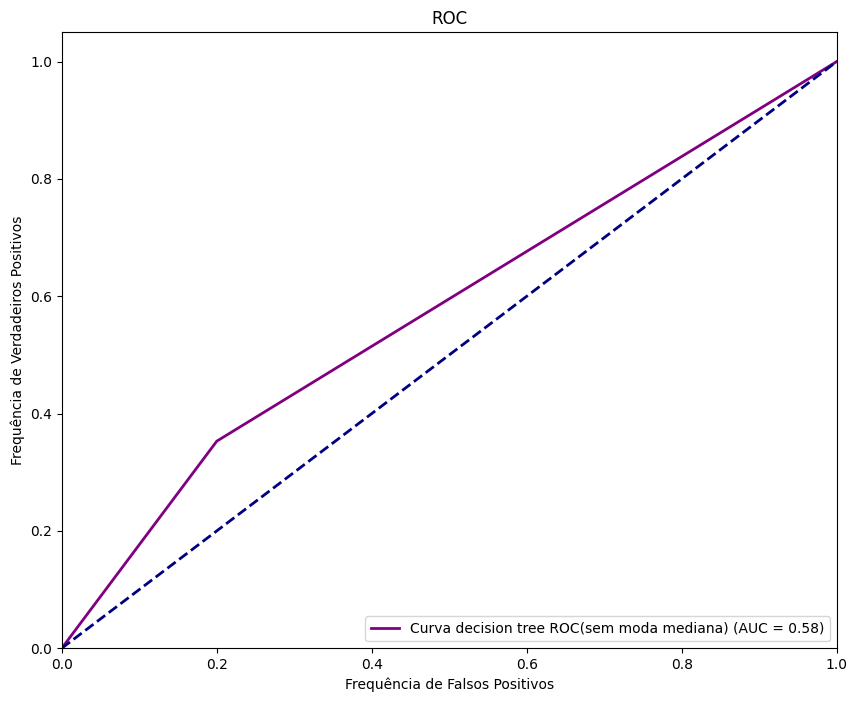

In [44]:
#Para classificação de Árvore de Decisão - sem moda_mediana
dt_fpr, dt_tpr, _ = roc_curve(testing_classes, probabilidade_dt[:, 1]) #Calcular a curva ROC
dt_roc_auc = auc(dt_fpr, dt_tpr) #Calcular a área sob a curva ROC

# Criar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(dt_fpr, dt_tpr, color='purple', lw=2, label='Curva decision tree ROC(sem moda mediana) (AUC = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Frequência de Falsos Positivos')
plt.ylabel('Frequência de Verdadeiros Positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

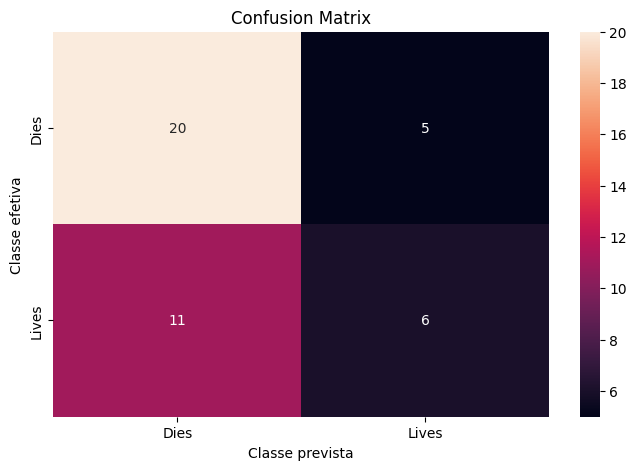

In [45]:
predictions = decision_tree_classifier.predict(testing_inputs) #Previsões no conjunto de teste

conf_matrix = confusion_matrix(testing_classes, predictions)

eixos= ['Dies', 'Lives']

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=eixos, yticklabels=eixos)
plt.title("Confusion Matrix")
plt.xlabel("Classe prevista")
plt.ylabel("Classe efetiva")
plt.show()


Neste gráfico, verificamos os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

(array([  4.,  10.,  48., 108., 207., 273., 213.,  98.,  31.,   8.]),
 array([0.38095238, 0.42619048, 0.47142857, 0.51666667, 0.56190476,
        0.60714286, 0.65238095, 0.69761905, 0.74285714, 0.78809524,
        0.83333333]),
 <BarContainer object of 10 artists>)

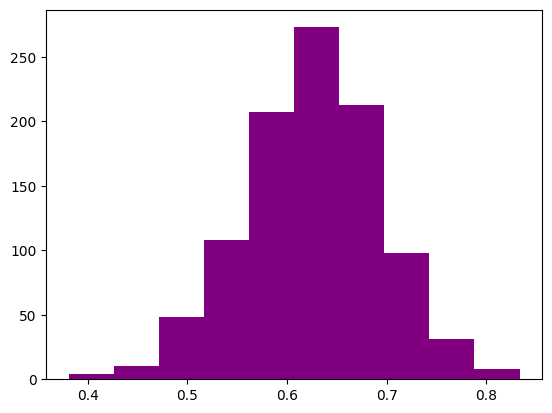

In [46]:
model_accuracies = [] #Lista para armazenar as eficácias do modelo

# Realizar a Árvore de Decisão repetidamente (1000 vezes)
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies, color='purple')

# Decision Tree - Representação dataset dados em falta

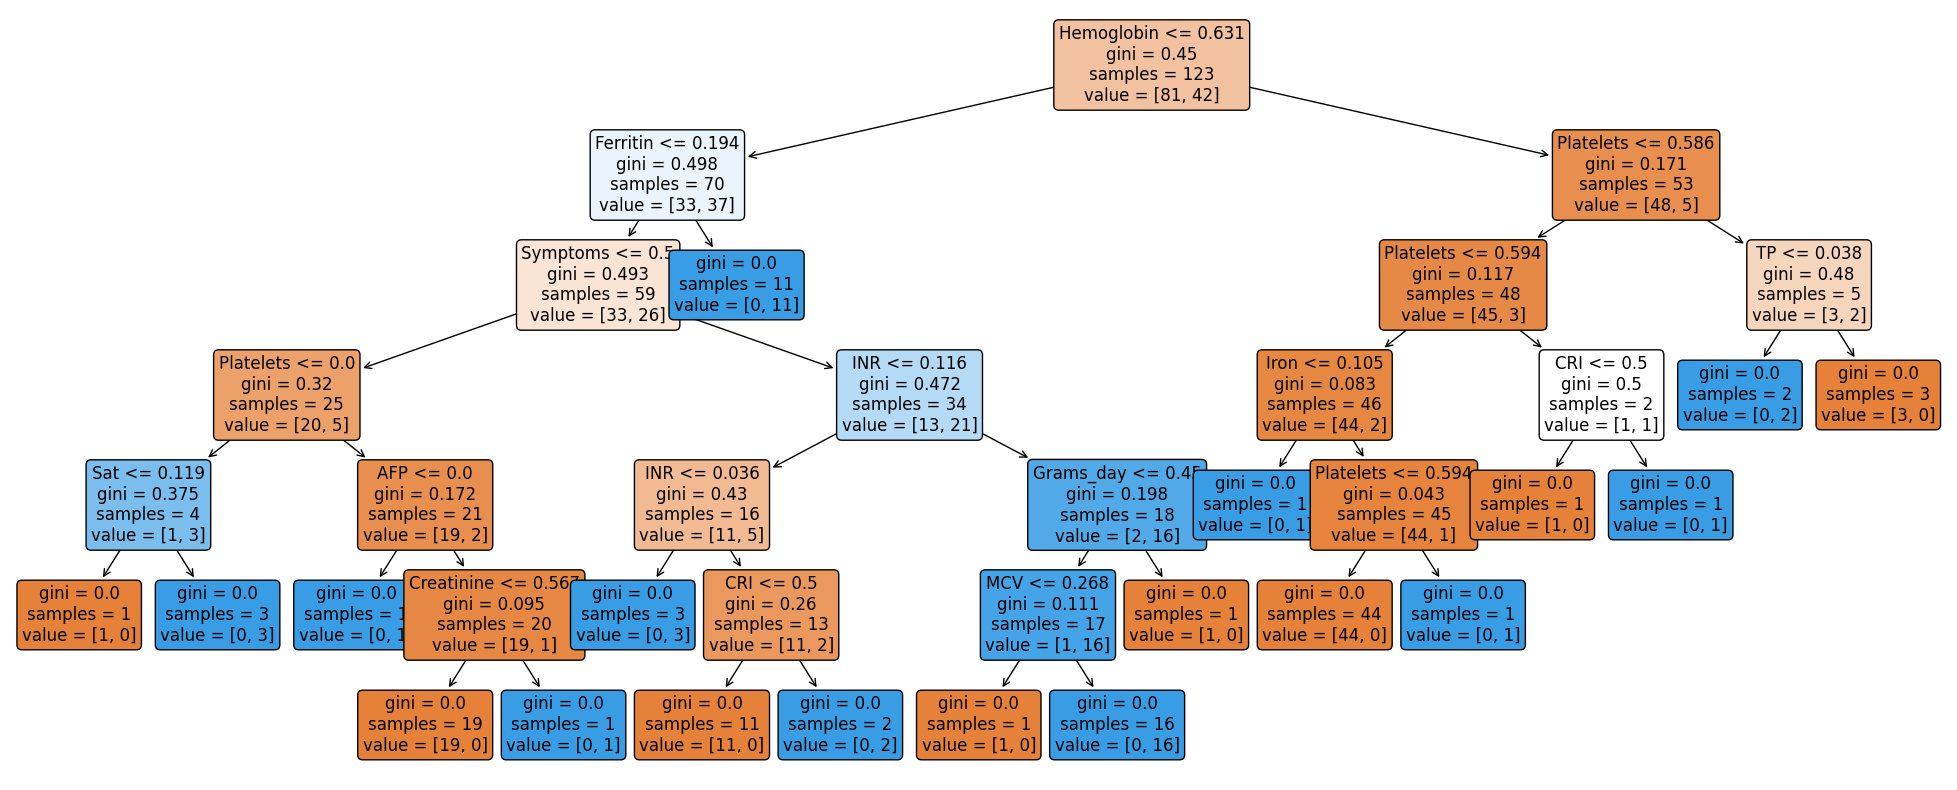

In [47]:
# Configurar o tamanho da figura
plt.figure(figsize=(25, 10))

# Traçar a árvore de decisão com diferentes parâmetros
plot_tree(
    decision_tree_classifier,
    max_depth=None,
    feature_names=df.columns,
    class_names=None,
    label='all',
    filled=True,  # Preencher nós com cores baseadas nas classes
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=True, 
    precision=3,
    ax=None,
    fontsize=12  
)

plt.show()

# Cross Validation - Dados em falta

In [48]:
# Criação do objeto StratifiedKFold
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Criação do modelo de árvore de decisão
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Execução da validação cruzada estratificada
scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=skf)

# Cálculo da pontuação média
pontuacao_media = np.mean(scores)
print(f"Pontuação média de validação cruzada estratificada: {pontuacao_media:.3f}")

Pontuação média de validação cruzada estratificada: 0.642


#  Aplicação no *Dataset* que foi preenchido utilizando a moda e mediana.

In [49]:
all_inputs = moda_mediana[colunas_totais].values

all_labels = moda_mediana["Class"].values

In [50]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [51]:
# Criar o classificador
decision_tree_classifier = DecisionTreeClassifier()

# Treinar o classificador
decision_tree_classifier.fit(training_inputs, training_classes)

# Validar o classificador, utilizando a eficácia de classificação
decision_tree_classifier.score(testing_inputs, testing_classes)

0.7380952380952381

In [52]:
y_pred_test = decision_tree_classifier.predict(testing_inputs)

recall_tree = recall_score(testing_classes, y_pred_test,average = 'macro')*100

precision_tree = precision_score(testing_classes, y_pred_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 75.176%
Precision: 76.353%


In [53]:
probabilidade_dt2 = decision_tree_classifier.predict_proba(testing_inputs)

# ROC

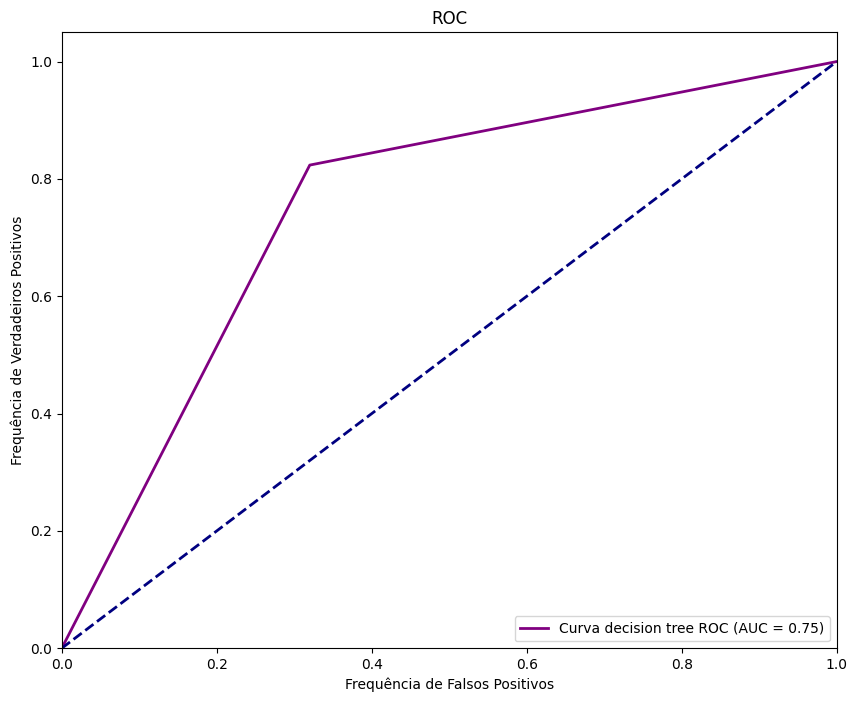

In [54]:
# Para classificação de Árvore de Decisão - com moda_mediana
dt_fpr2, dt_tpr2, _ = roc_curve(testing_classes, probabilidade_dt2[:, 1])
dt_roc_auc2 = auc(dt_fpr2, dt_tpr2)

# Criar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(dt_fpr2, dt_tpr2, color='purple', lw=2, label='Curva decision tree ROC (AUC = %0.2f)' % dt_roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Frequência de Falsos Positivos')
plt.ylabel('Frequência de Verdadeiros Positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

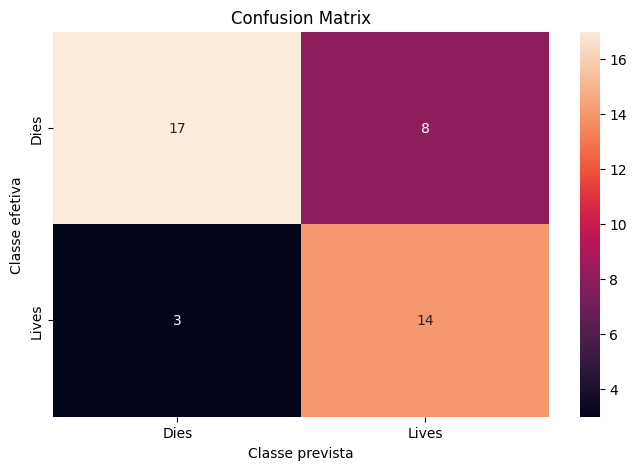

In [55]:
predictions = decision_tree_classifier.predict(testing_inputs)

conf_matrix = confusion_matrix(testing_classes, predictions)

eixos= ['Dies', 'Lives']

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=eixos, yticklabels=eixos)
plt.title("Confusion Matrix")
plt.xlabel("Classe prevista")
plt.ylabel("Classe efetiva")
plt.show()


(array([  2.,  16.,  62., 138., 224., 266., 195.,  70.,  24.,   3.]),
 array([0.4047619 , 0.45      , 0.4952381 , 0.54047619, 0.58571429,
        0.63095238, 0.67619048, 0.72142857, 0.76666667, 0.81190476,
        0.85714286]),
 <BarContainer object of 10 artists>)

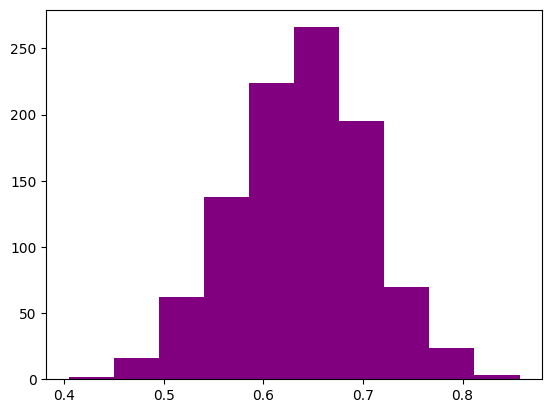

In [56]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies, color='purple')

# Decision Tree - Representação moda_mediana

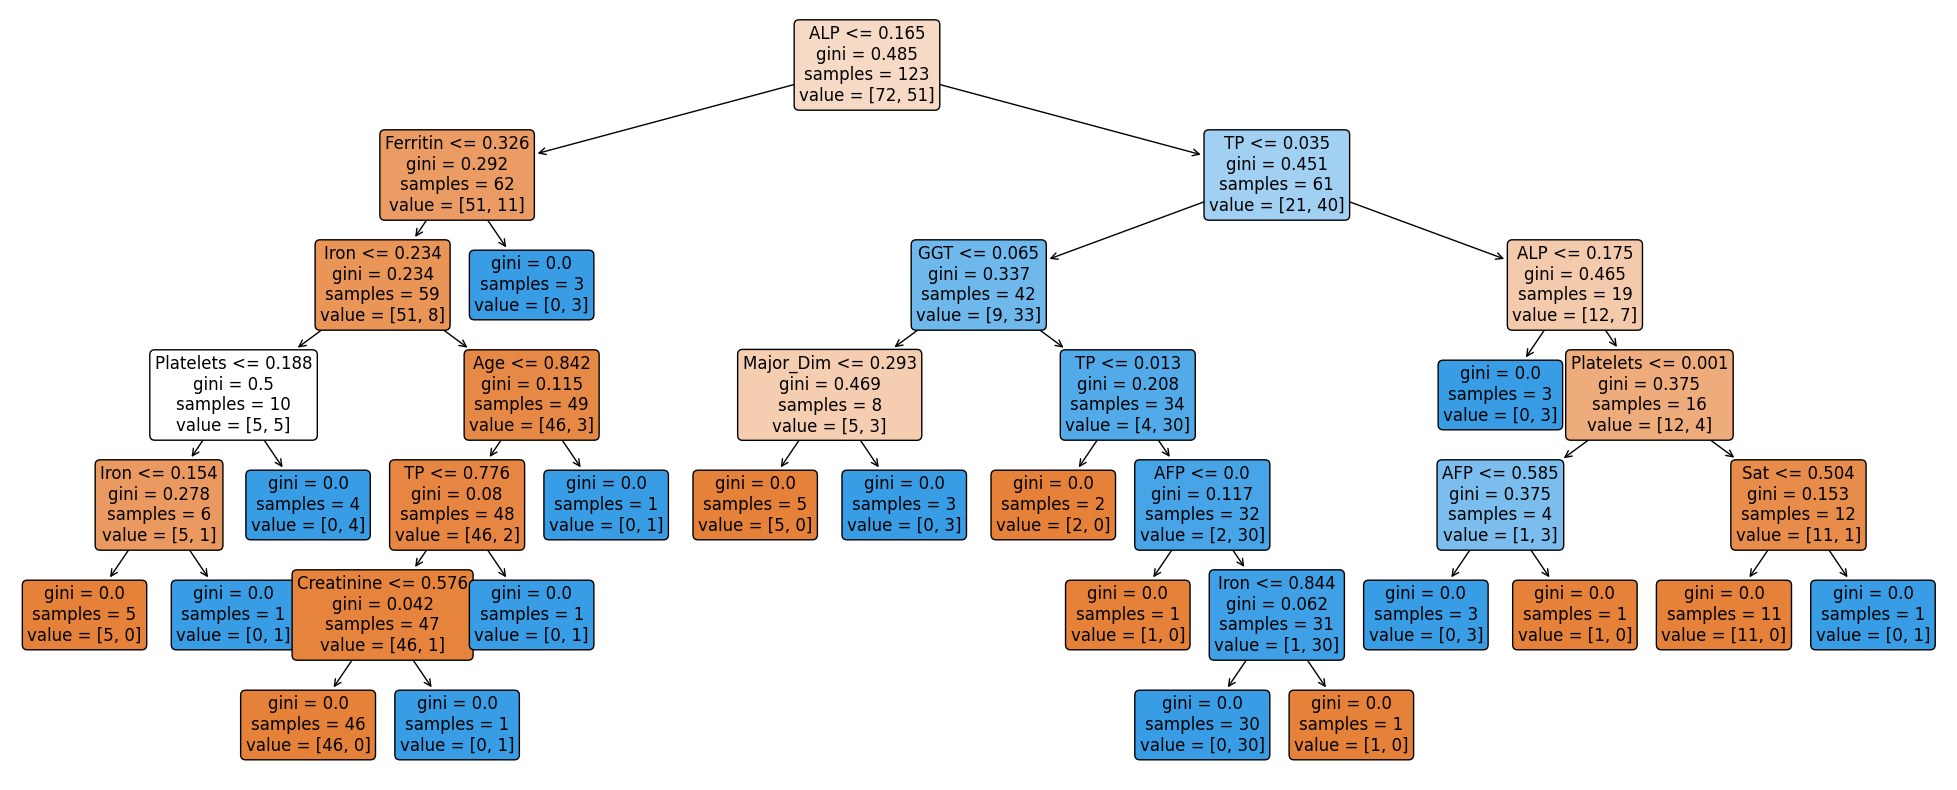

In [57]:
plt.figure(figsize=(25, 10))

# Traçar a árvore de decisão com diferentes parâmetros
plot_tree(
    decision_tree_classifier,
    max_depth=None,
    feature_names=df.columns,
    class_names=None,
    label='all',
    filled=True,  # Preencher nós com cores baseadas nas classes
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=True,  
    precision=3,
    ax=None,
    fontsize=12 
)

plt.show()

Na representação da Decision Tree, verificamos que as variáveis que se encontram nos nós superiores são consideradas mais relevantes.

# Cross Validation - Decision Tree moda_mediana

In [58]:
X = moda_mediana.iloc[:, 0:47]  # Variáveis do dataset
Y = moda_mediana.iloc[:, 48]    # Variável "Class"

# Criação do objeto StratifiedKFold
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Criação do modelo de árvore de decisão
dt = DecisionTreeClassifier(random_state=42)

# Execução da validação cruzada
scores = cross_val_score(dt, X, Y, cv=skf)

# Cálculo da pontuação média
pontuacao_media = np.mean(scores)
print(f"Pontuação média de validação cruzada estratificada: {pontuacao_media:.3f}")

Pontuação média de validação cruzada estratificada: 0.655


# KNN

O algoritmo K-Nearest Neighbor (KNN) classifica com base na distância a um número k - número de vizinhos mais próximos que serão usados para fazer previsões. Este algoritmo apenas será aplicado ao dataset *moda_mediana*, pois não pode ser utilizado para datasets com valores nulos.

In [59]:
#Dividir dataset em treino e teste

size = 0.3 #Tamanho do dataset de teste
X = moda_mediana.iloc[:,0:47] #Variáveis do dataset
Y = moda_mediana.iloc[:,48] #Variável "Classe"
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)


In [60]:
#Proporção de cada classe no conjunto treino e no conjunto teste
y_train.value_counts() / len(y_train) * 100
y_test.value_counts() / len(y_test) * 100

Class
0    60.0
1    40.0
Name: count, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, stratify=Y) # O parâmetro 'stratify' garante que as proporções das classes em Y sejam mantidas nos conjuntos de treino e teste

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

knn_preds_train = knn.predict(X_train) #Previsão treino

knn_acc_train = sum(knn_preds_train == y_train)/ len(y_train) #Percentagem de casos treino corretamente classificados

knn_preds_test = knn.predict(X_test) #Previsão teste

knn_acc_test = sum(knn_preds_test == y_test)/ len(y_test) #Percentagem de casos teste corretamente classificados

In [63]:
print ("KNN Train Accuracy: %.3f" % knn_acc_train)
print ("KNN Test Accuracy: %.3f" % knn_acc_test)

KNN Train Accuracy: 0.870
KNN Test Accuracy: 0.560


In [64]:
recall_tree = recall_score(y_test, knn_preds_test,average = 'macro')*100

precision_tree = precision_score(y_test, knn_preds_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 51.273%
Precision: 54.171%


Após testar com diferentes valores de n_neighbors, concluímos que, em média, se obtém uma maior eficácia com n_neighbors = 3.

In [65]:
probabilidade_knn = knn.predict_proba(X_test)

# ROC

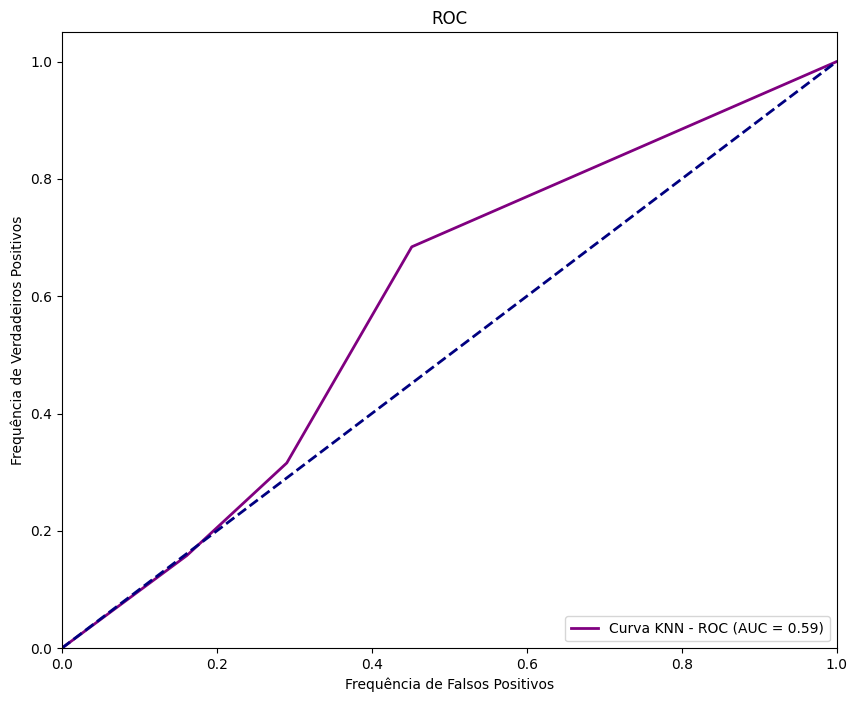

In [66]:
# Para classificação do KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, probabilidade_knn[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Criar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(knn_fpr, knn_tpr, color='purple', lw=2, label='Curva KNN - ROC (AUC = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Frequência de Falsos Positivos')
plt.ylabel('Frequência de Verdadeiros Positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

É de notar, que os algoritmos têm divisões de trainsets e testsets diferentes. Deste modo, não podemos tirar conlcusões comparativas acerca deles.

# Avaliação da eficácia do KNN - Confusion Matrix:

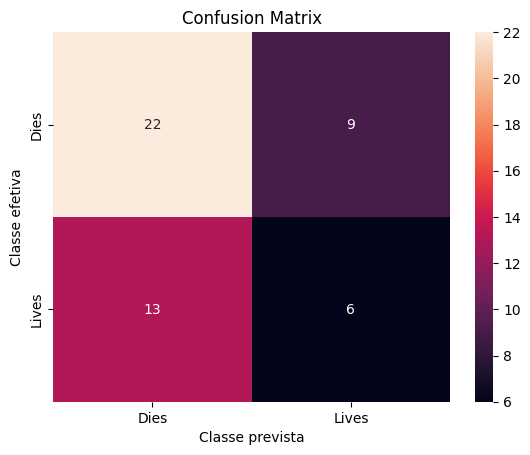

In [67]:
cm = confusion_matrix(y_test, knn_preds_test)

eixos= ['Dies', 'Lives']

sns.heatmap(cm, annot=True, fmt='d', xticklabels= eixos, yticklabels= eixos)
plt.xlabel('Classe prevista')
plt.ylabel('Classe efetiva')
plt.title('Confusion Matrix')
plt.show()


Neste gráfico, verificamos os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.


# *Learning Curve*

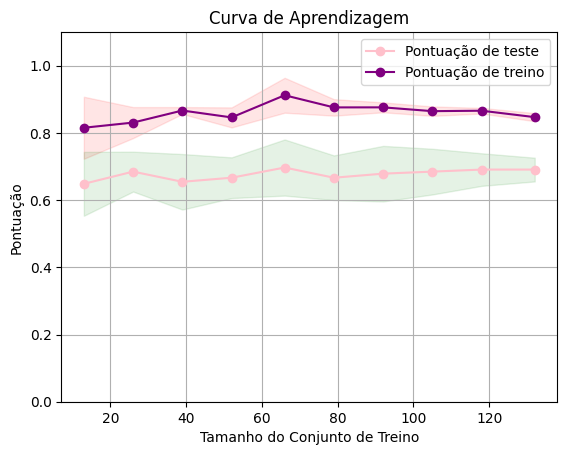

In [68]:
# Curva de Aprendizagem
train_sizes, train_scores, test_scores = learning_curve(knn, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular, para as pontuações, os desvios padrão e médias.
train_scores_std = np.std(train_scores, axis=1)
train_scores_mean = np.mean(train_scores, axis=1)

test_scores_std = np.std(test_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Desenhar a curva de aprendizagem
plt.figure()
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("Pontuação")
plt.ylim(0.0, 1.1)
plt.grid()

# Área sombreada para o desvio padrão
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Linhas das pontuações médias
plt.plot(train_sizes, test_scores_mean, 'o-', color="#FFC0CB", label="Pontuação de teste") 

plt.plot(train_sizes, train_scores_mean, 'o-', color="#800080", label="Pontuação de treino") 

plt.legend(loc="best")

plt.show() 

# Cross-Validation - KNN

De modo a não depender numa escolha aleatória de uma porção do dataset para teste, a Cross-Validation divide o dataset em várias partes, deixando apenas uma para o teste. Assim, cada divisão é usada como teste exatamente uma vez.


Iremos agora proceder à Cross-Validation estratificada com 10 divisões - *Stratified K-fold cross-validation*.


In [69]:
# Parâmetros
n_folds = 10  # Número de divisões para a validação cruzada estratificada
X = moda_mediana.iloc[:, 0:47]  # Variáveis do dataset
Y = moda_mediana.iloc[:, 48]  # Variável "Class"
scores = []

# Criação do objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Execução da validação cruzada estratificada
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Criação e treino do KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # Avaliação do modelo no conjunto de teste
    score = knn.score(X_test, y_test)
    scores.append(score)

# Cálculo da pontuação média
pontuacao_media = np.mean(scores)
print(f"Pontuação média de validação cruzada estratificada: {pontuacao_media:.3f}")

Pontuação média de validação cruzada estratificada: 0.662


In [70]:
pred_knn_test = knn.predict(X_test)
    
recall_tree = recall_score(y_test, pred_knn_test,average = 'macro')*100

precision_tree = precision_score(y_test, pred_knn_test,average = 'weighted', zero_division=1)*100

recall_tree = float("{:.3f}".format(recall_tree))
precision_tree = float("{:.3f}".format(precision_tree))

print("Recall: %.3f" % (recall_tree) + "%")
print("Precision: %.3f" % (precision_tree) + "%")

Recall: 75.000%
Precision: 85.577%


# Visualização da Cross-Validation Estratificada:

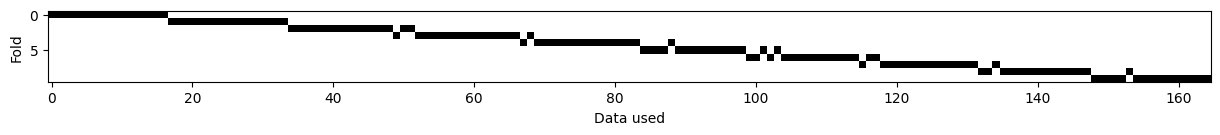

In [71]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels): # Iterar sobre cada fold na validação cruzada
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)

    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Data used')


plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

# *Learning Curve*


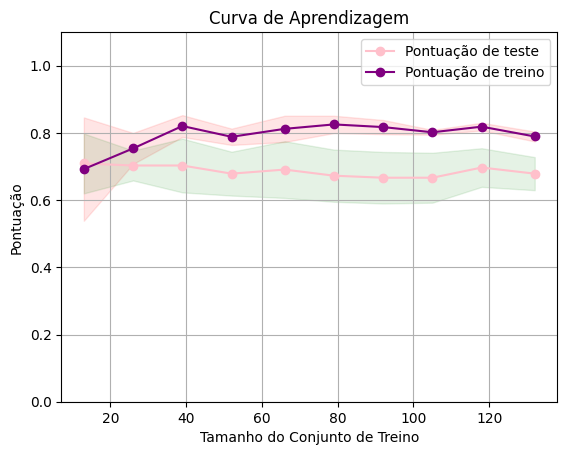

In [72]:
# Curva de Aprendizagem
train_sizes, train_scores, test_scores = learning_curve(knn, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular, para as pontuações, os desvios padrão e médias.
train_scores_std = np.std(train_scores, axis=1)
train_scores_mean = np.mean(train_scores, axis=1)

test_scores_std = np.std(test_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Desenhar a curva de aprendizagem
plt.figure()
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("Pontuação")
plt.ylim(0.0, 1.1)
plt.grid()

# Área sombreada para o desvio padrão
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Linhas das pontuações médias
plt.plot(train_sizes, test_scores_mean, 'o-', color="#FFC0CB", label="Pontuação de teste") 

plt.plot(train_sizes, train_scores_mean, 'o-', color="#800080", label="Pontuação de treino") 


plt.legend(loc="best") 

plt.show() 

In [73]:
probabilidade_knn = knn.predict_proba(X_test)

# ROC

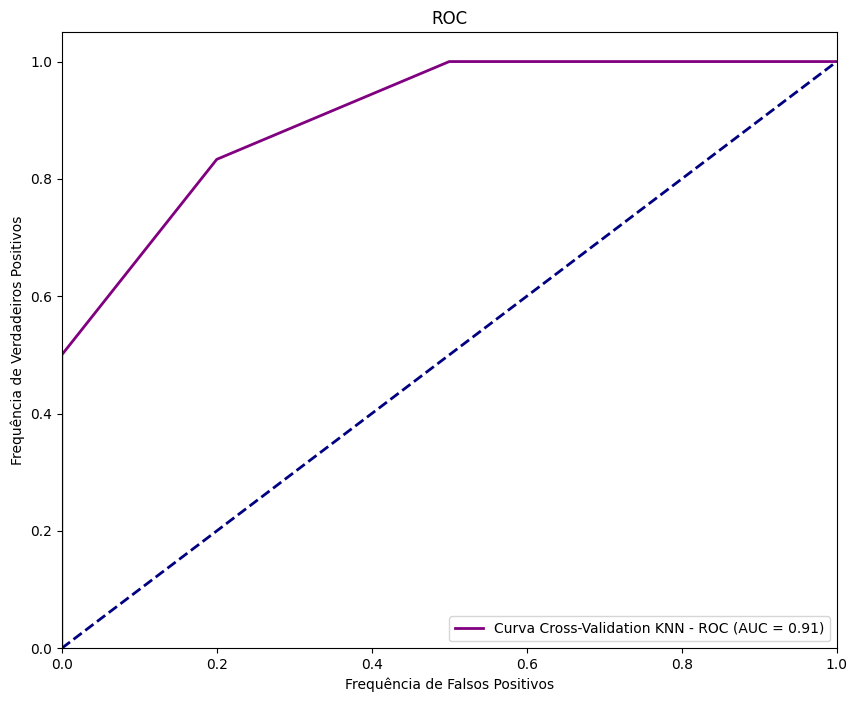

In [74]:
# Para classificação do KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, probabilidade_knn[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Criar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(knn_fpr, knn_tpr, color='purple', lw=2, label='Curva Cross-Validation KNN - ROC (AUC = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Frequência de Falsos Positivos')
plt.ylabel('Frequência de Verdadeiros Positivos')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# Conclusão

Analisamos o dataset de HCC do Centro Hospitalar e Universitário de Coimbra, composto por 49 variáveis de 165 pacientes.

Concluímos que facilmente se atinge uma relativamente alta taxa de eficácia, utilizando os algoritmos de machine learning lecionados.

Consideramos que uma boa atualização a este dataset seria a variável tempo de sobrevivência do paciente, de modo a distinguir o estado de desenvolvimento da doença no paciente.

Ao longo do Notebook utilizamos n_neighbors = 3 e n_neighbors = 5, para o KNN e Cross-Validation, respetivamente, dado que, após testar com diferentes valores de n_neighbors, concluímos que, em média, se obtém uma maior eficácia com estes valores.

## Decision Trees 

Vantagens:

* Fácil implementação;
* Pode ser aplicado a datasets com dados em falta;
* Algoritmo hierárquico, o que permite uma fácil compreensão.

Desvantagens:

* Excesso de variáveis pode levar a um overfitting (adaptação excessiva);
* É menos eficiente em datasets com mais variáveis, pois só seleciona algumas.

## KNN


Comparando o KNN test split com o  KNN Cross-Validation, podemos averiguar que apesar da accuracy do test  split ser superior, nos restantes parâmetros o Cross-Validation é bastante mais eficaz.

Vantagens:

* Muito preciso;
* Fácil implementação;
* Não requer treino, os dados em si são o modelo que será referência para previções futuras.

Desvantagens:

* Não trabalha com dados em falta;
* Aleatoriedade;
* Com datasets maiores, pode demorar muito tempo a processar a informação.

## Cross-Validation

Vantagens:

* Reduz o overfitting, isto é, ajuda a verificar se o modelo está demasiado vinculado aos dados do treino, mas não generaliza bem para novos dados;
* Os dados são todos usados tanto para treino como para validação, o que é benéfico quando os dados são finitos (como no nosso caso);
* Permite avaliar as variações no desempenho do modelo, tendo em conta diferentes subconjuntos de dados. Isto ajuda a identificar problemas como o desbalanceamento nos dados.

Desvantagens:

* Difícil execução, já que exige uma enorme atenção para garantirmos que a divisão seja realizada corretamente e que os dados sejam baralhados de forma adequada;
* Exige mais da memória, o que pode causar problemas;
* Requer cuidado na interpretação dos resultados.


## Test Split

Vantagens:

* Menos custo computacional e de memória em relação ao cross-validation;
* Fácil implementação, sendo apenas necessário a divisão entre treino e teste;
* Fácil interpretação, já que a performance é derivada da avaliação de um único conjunto de dados de teste.

Desvantagens:

* A performance altera significativamente se a forma como os dados são divididos também alterar;
* Há uma menor quantidade de dados para teste,já que alguns estão reservados para o treino;
* Se a divisão treino/teste não for representativa, pode levar a uma avaliação otimista ou pessimista.

## Avaliação final dos modelos:


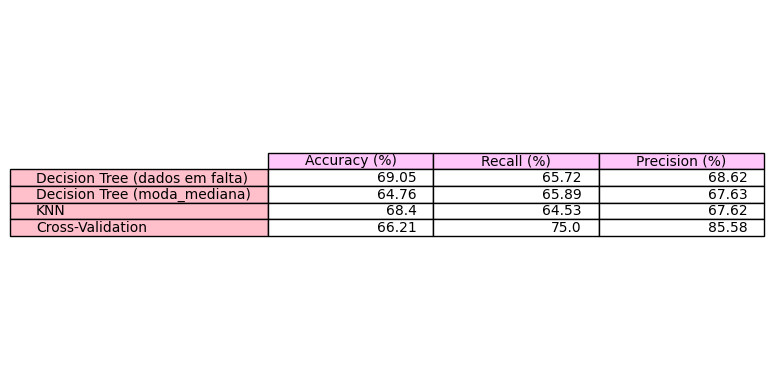

In [75]:
fig, ax =plt.subplots(1,1)
data=[[69.05, 65.72, 68.62],
      [64.76, 65.89, 67.63],
      [68.40, 64.53, 67.62],
      [66.21, 75.00, 85.58]]
column_labels=["Accuracy (%)","Recall (%)","Precision (%)"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,
        colLabels=df.columns,
        rowLabels=["Decision Tree (dados em falta)", "Decision Tree (moda_mediana)", "KNN","Cross-Validation"],
        rowColours =["#FFC0CB"] * 4,  
        colColours =["#FFC6FC"] * 3,
        loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)

plt.show()

Em geral, a Decision Tree com dados em falta foi mais eficiente que a Decision Tree moda_mediana, sendo superior tanto na accuracy como na precision, porém um pouco inferior no recall. Tal leva-nos a concluir que não foi uma mudança eficaz e, por isso, deveríamos procurar outras alternativas para o preenchimento de dados.

Por fim, para futuros trabalhos a realizar, consideramos que realizar um método de imputação mais complexo traria dados mais fiáveis, que por sua vez, poderiam dar-nos resultados mais eficazes - Multiple Imputation by Chained Equations (MICE) ou Expectation-Maximization (EM), por exemplo.